#Data Sci Eng Methods

# Assignment 1 - ML Data Cleaning and Feature Selection

ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

* For categorical data, calculate the accuracy and a confusion matrix.

#Abstract

This dataset provides a comprehensive exploration of the placement data of students from XYZ campus, serving as a critical tool in understanding the determinants of successful job placements in a higher education context. The dataset intricately compiles key educational and professional parameters, offering a multi-dimensional view into the journey from academia to employment.

Key components of the dataset include:

**Secondary and Higher Secondary Education Data: **Capturing percentages and specializations at both secondary and higher secondary levels, this aspect of the dataset offers insight into early academic trajectories of students.

**Degree Specialization and Type:** Detailing students' specializations in their tertiary education, and the types of degrees pursued, this section provides a nuanced understanding of higher education choices and their potential impact on employability.

**Work Experience:** Including data on prior work experience, the dataset allows for analysis of how practical, real-world experience influences placement outcomes.

**Salary Offers:** For students who successfully secure placements, the dataset includes the salary packages offered, shedding light on the economic returns of various educational pathways and experiences.

This dataset is pivotal for educational institutions, policy makers, researchers, and students themselves in comprehending the intricate dynamics between academic background, work experience, and successful placement. It stands as a valuable resource for analyzing trends, identifying key factors that contribute to employability, and shaping future educational and career guidance strategies.

**About Dataset**-

This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

In [ ]:
! pip install XGboost

In [ ]:
! pip install eli5

In [79]:
import pandas as pd

# Load the dataset
file_path = '/content/Placement_Data_Full_Class.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Data Types (Numeric and Categorical)**

In [ ]:
# Identify the data types
data_types = data.dtypes
numeric_data = data.select_dtypes(include=['float64', 'int64'])
categorical_data = data.select_dtypes(include=['object'])

print("Numeric Columns:\n", numeric_data.columns)
print("\nCategorical Columns:\n", categorical_data.columns)

Numeric Columns:
 Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

Categorical Columns:
 Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')


**Missing Values**  

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values = missing_values[missing_values > 0]
print(missing_values)

salary    67
dtype: int64


**QQ PLot**

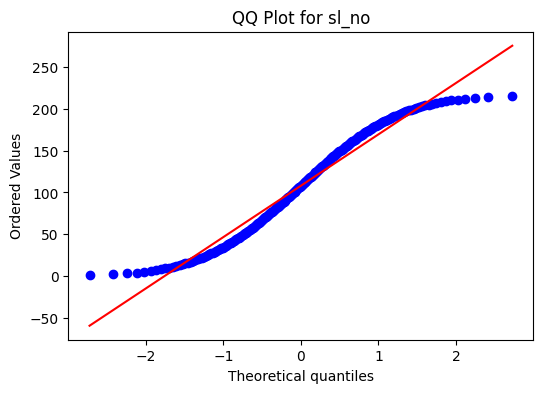

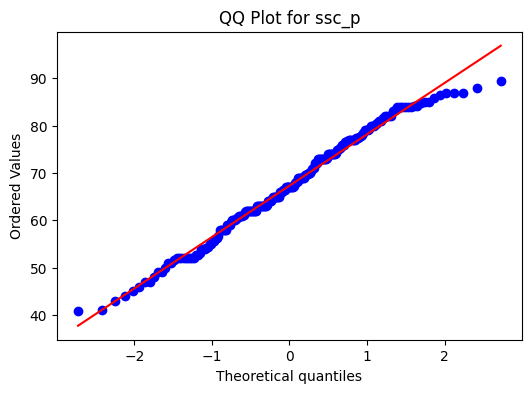

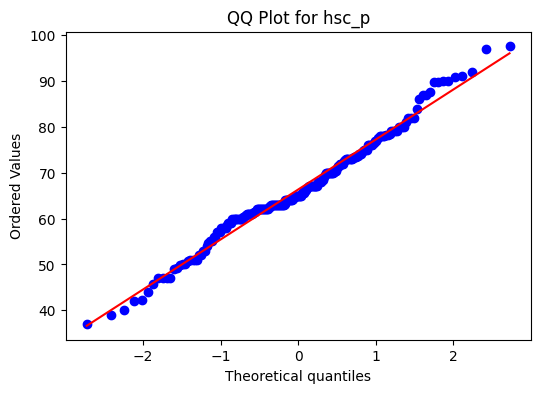

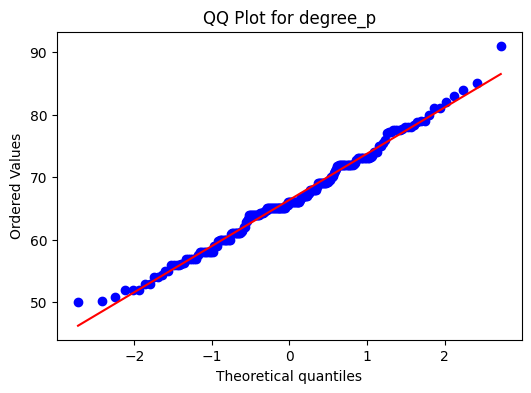

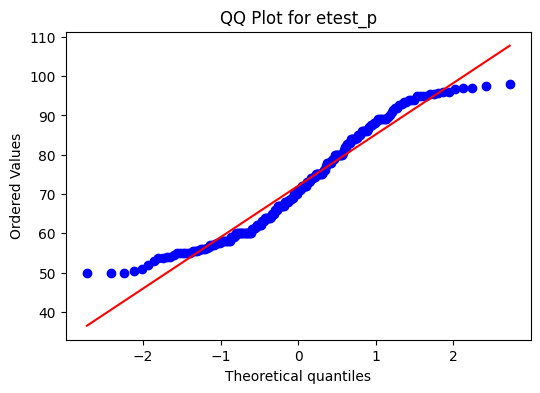

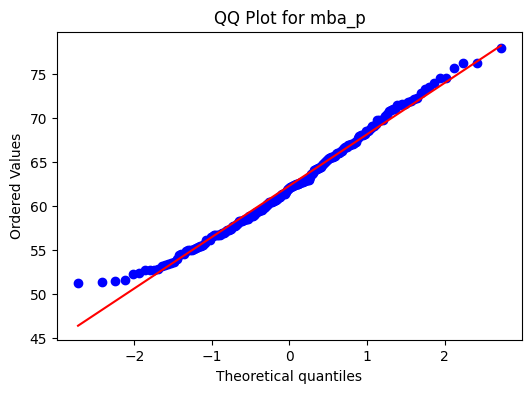

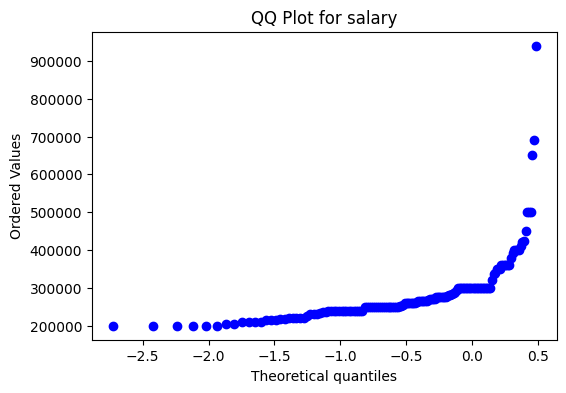

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the dataset
placement_data = pd.read_csv('Placement_Data_Full_Class.csv')

# Identify numeric columns in the dataset
numeric_columns = placement_data.select_dtypes(include=[np.number]).columns.tolist()

# Function to create QQ plots for each numeric independent variable
def create_qq_plots(data, numeric_cols):
    for col in numeric_cols:
        plt.figure(figsize=(6, 4))
        stats.probplot(data[col], dist="norm", plot=plt)
        plt.title(f'QQ Plot for {col}')
        plt.show()

# Create QQ plots for numeric independent variables
create_qq_plots(placement_data, numeric_columns)


The code I have provided reads a dataset using Pandas, identifies the numeric columns in the dataset, and then creates Quantile-Quantile (QQ) plots for each numeric independent variable. QQ plots are used to assess whether a dataset follows a normal distribution by comparing the data's quantiles to the quantiles of a theoretical normal distribution.

Here's a breakdown of what the code does:

1. Import the necessary libraries: Pandas, NumPy, Matplotlib, and SciPy's stats module.

2. Load a dataset named 'Placement_Data_Full_Class.csv' using Pandas and store it in the variable `placement_data`.

3. Identify the numeric columns in the dataset by using `select_dtypes` with the `include=[np.number]` argument. This extracts columns with numeric data types (e.g., float64, int64) and stores their names in the list `numeric_columns`.

4. Define a function `create_qq_plots` that takes two arguments: `data` (the dataset) and `numeric_cols` (a list of numeric column names).

5. Inside the function, there is a loop that iterates through each numeric column specified in `numeric_cols`.

6. For each column, it creates a new figure (plot) using `plt.figure(figsize=(6, 4))` with a specified figure size.

7. The `stats.probplot` function from SciPy is used to create the QQ plot. It takes the data in the specified column (`data[col]`), assumes a normal distribution (`dist="norm"`), and then plots the QQ plot on the current figure (`plot=plt`).

8. The title of the QQ plot is set to indicate which column it represents, e.g., "QQ Plot for Salary" for the salary column.

9. Finally, the plot is displayed using `plt.show()`.

10. The `create_qq_plots` function is called with `placement_data` (the dataset) and `numeric_columns` (the list of numeric column names) as arguments to create QQ plots for all numeric independent variables in the dataset.

These QQ plots will help you visually assess whether each numeric variable follows a normal distribution. If the data points closely follow the diagonal line in the QQ plot, it suggests that the data is approximately normally distributed. Deviations from the diagonal line may indicate departures from normality, which can be useful information for statistical analysis and modeling.

**Box Plot**

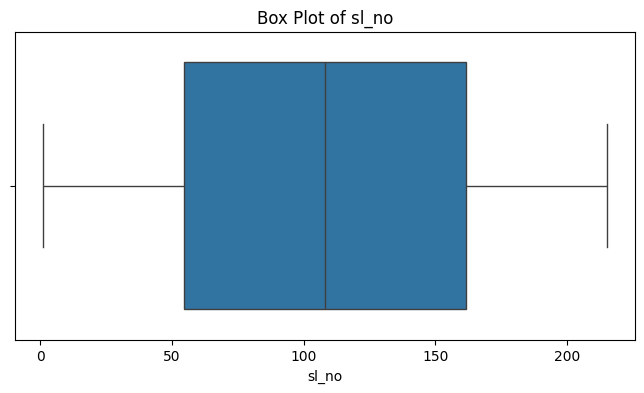

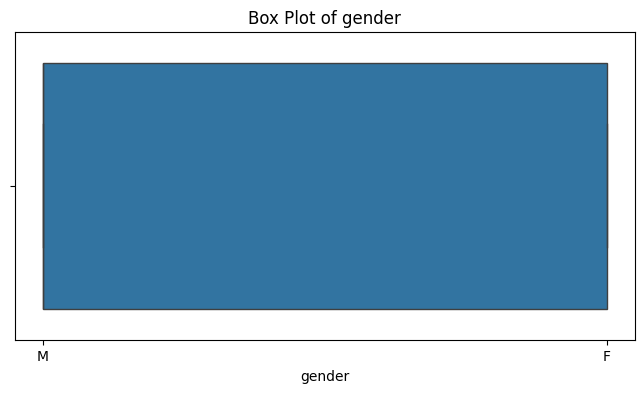

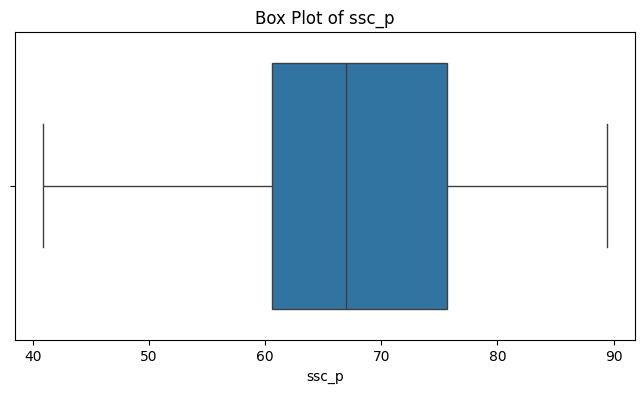

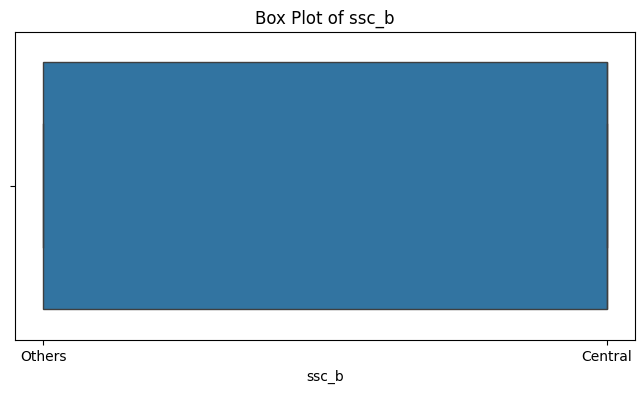

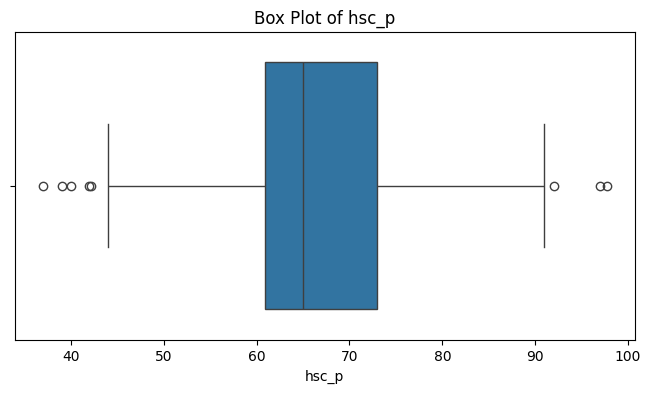

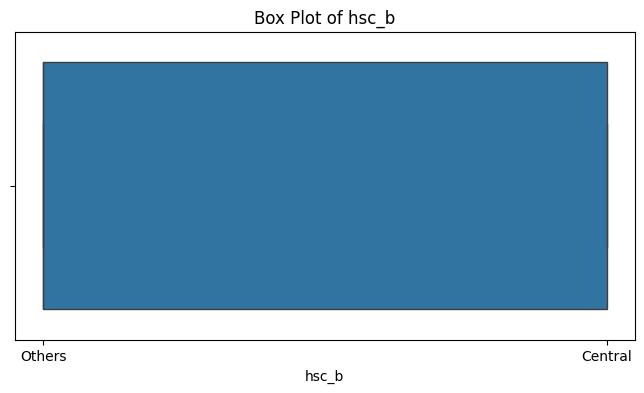

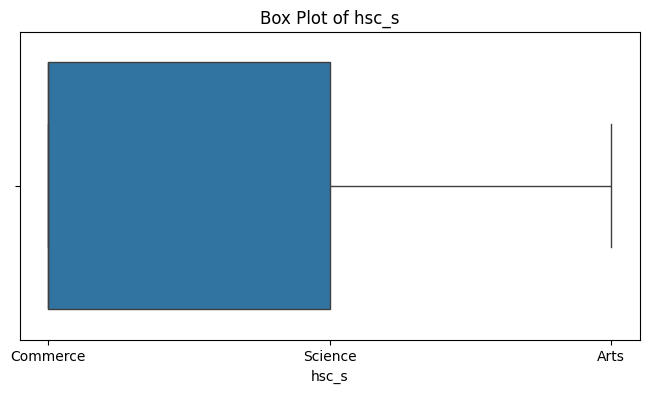

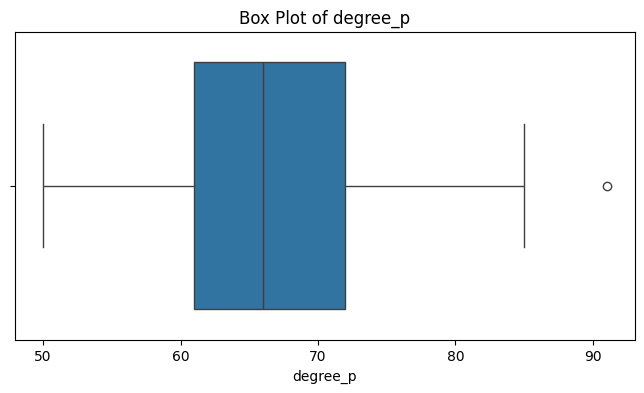

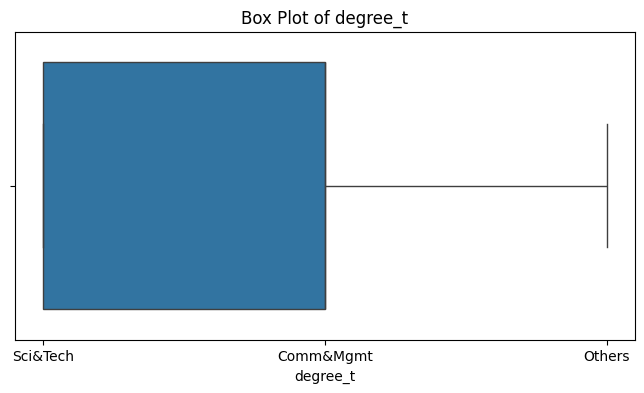

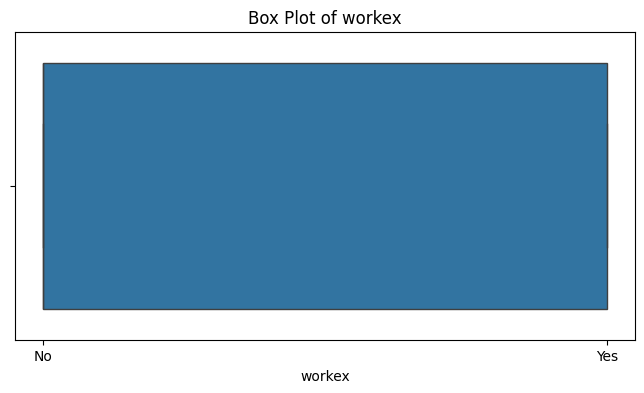

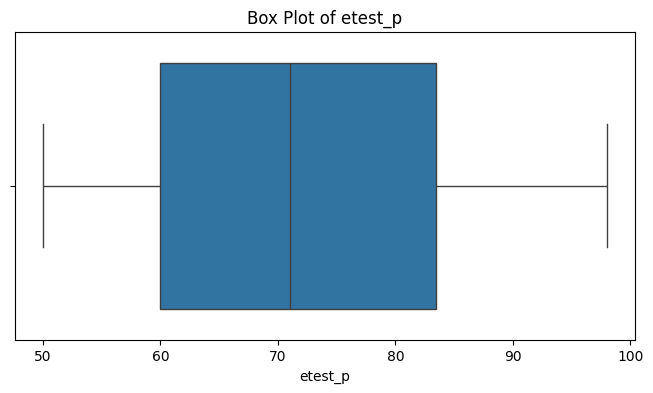

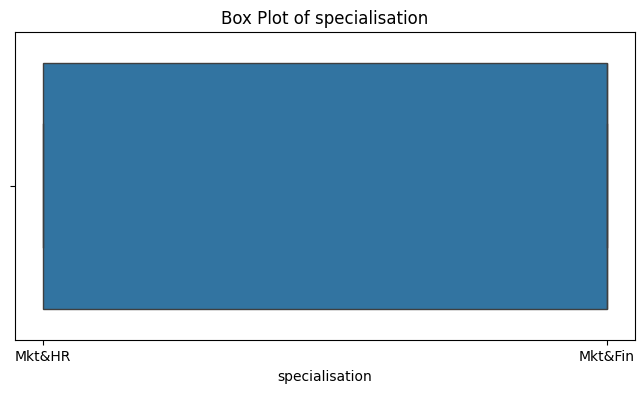

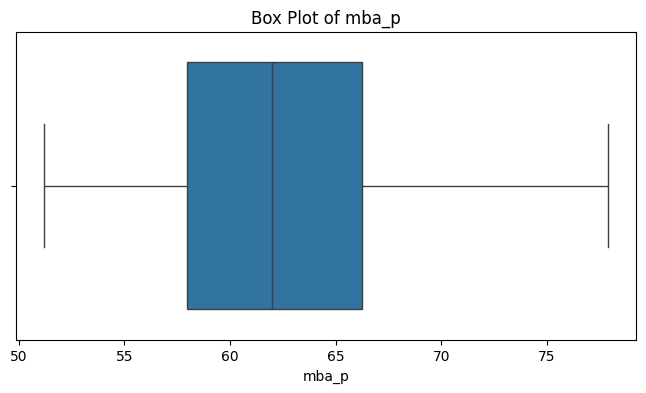

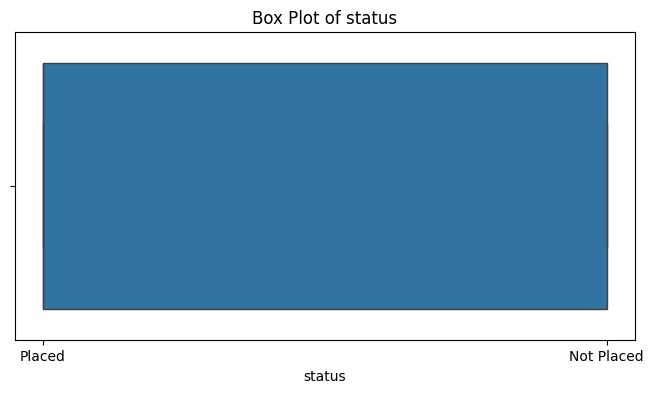

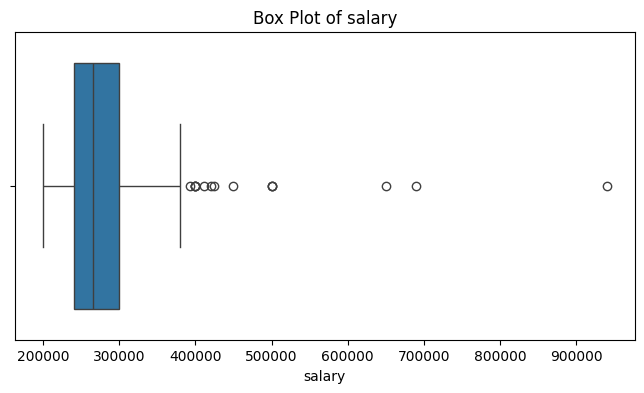

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
placement_data = pd.read_csv('Placement_Data_Full_Class.csv')
# Plotting box plots for each column in the dataset
for column in placement_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=placement_data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()


The code provided loads a dataset using Pandas and then creates box plots for each column in the dataset using the Seaborn library. Box plots are a useful visualization for summarizing the distribution of data, including the median, quartiles, and any potential outliers.

1. Import the necessary libraries: Pandas, Matplotlib, and Seaborn.

2. Load a dataset named 'Placement_Data_Full_Class.csv' using Pandas and store it in the variable `placement_data`. Make sure to adjust the file path if necessary to match the location of your CSV file.

3. The code then iterates through each column in the `placement_data` DataFrame using a for loop.

4. For each column, it creates a new figure (plot) with a specified figure size (8x4) using `plt.figure(figsize=(8, 4))`.

5. The `sns.boxplot` function from Seaborn is used to create the box plot. It specifies the `x` parameter as the data in the current column (`placement_data[column]`). This generates a box plot for the distribution of values in that column.

6. The title of the box plot is set to indicate which column it represents, e.g., "Box Plot of Salary" for the salary column.

7. Finally, the plot is displayed using `plt.show()`.

This code will generate a series of box plots, one for each column in the dataset. These box plots provide valuable insights into the distribution of data, including the median, interquartile range, and the presence of potential outliers for each variable.

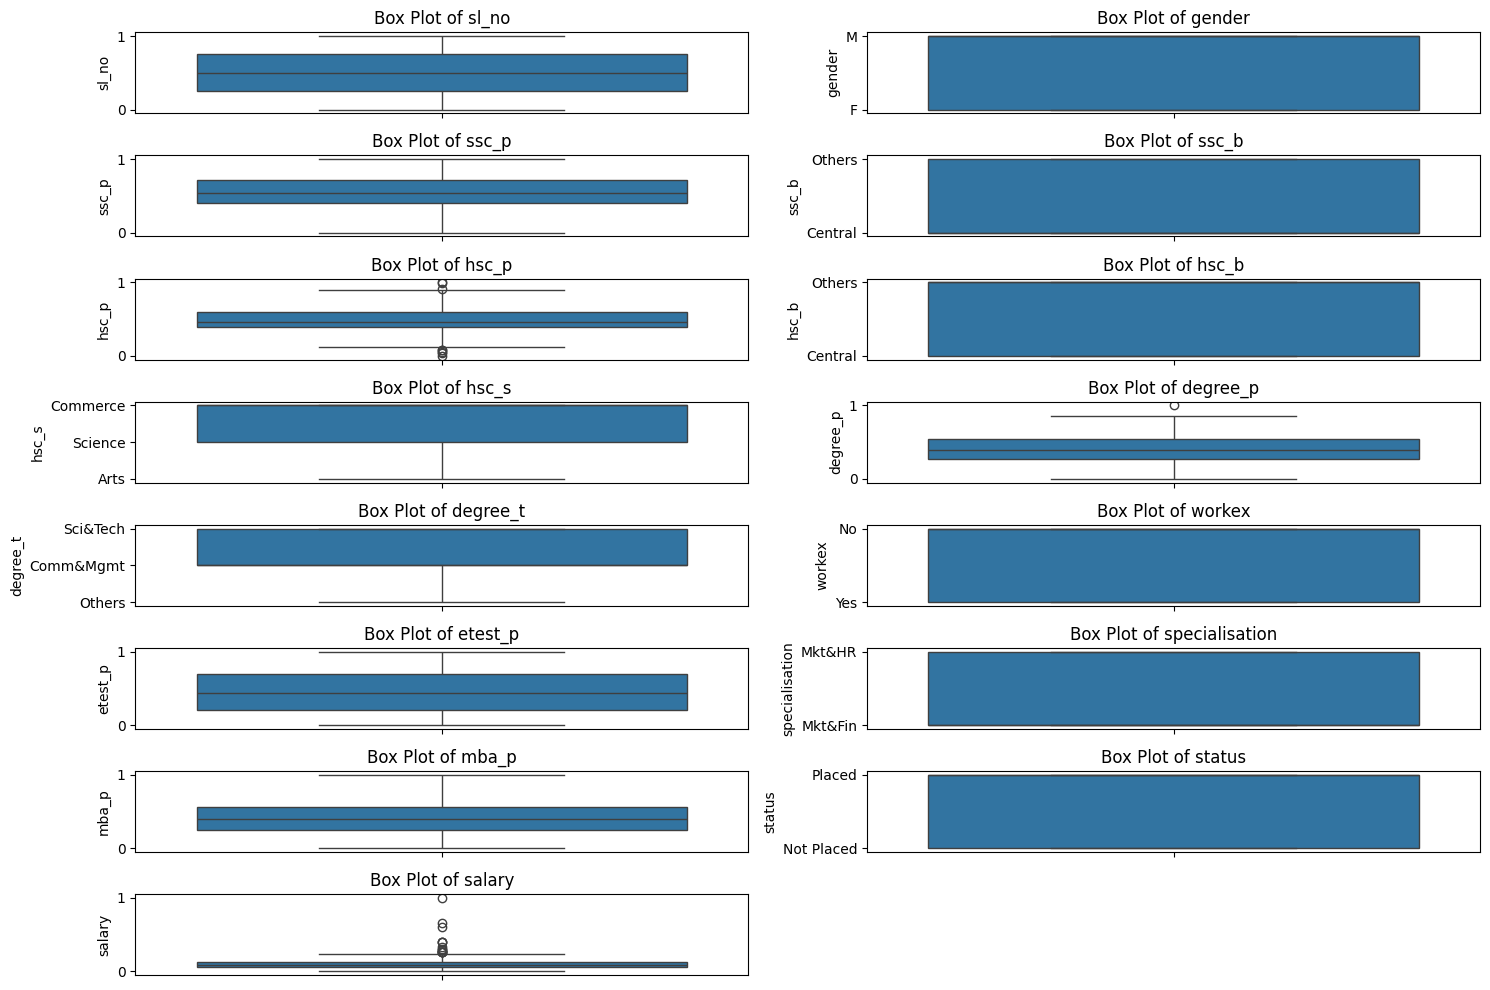

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
placement_data = pd.read_csv('Placement_Data_Full_Class.csv')  # Adjust the path if necessary

# Separating numeric and categorical columns
numeric_columns = placement_data.select_dtypes(include=[np.number]).columns
categorical_columns = placement_data.select_dtypes(exclude=[np.number]).columns

# Normalizing numeric columns using Min-Max Scaler
scaler = MinMaxScaler()
placement_data[numeric_columns] = scaler.fit_transform(placement_data[numeric_columns])

# Plotting box plots for each column in a single figure
plt.figure(figsize=(15, 10))
for i, column in enumerate(placement_data.columns):
    plt.subplot(len(placement_data.columns) // 2 + len(placement_data.columns) % 2, 2, i + 1)
    sns.boxplot(y=placement_data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


This code loads a dataset using Pandas, separates the columns into numeric and categorical columns, and then normalizes the numeric columns using Min-Max scaling. Afterward, it creates a single figure with multiple subplots to display box plots for each column in the dataset using Seaborn and Matplotlib.

1. Import the necessary libraries: Pandas, Matplotlib, Seaborn, and `MinMaxScaler` from Scikit-Learn.

2. Load a dataset named 'Placement_Data_Full_Class.csv' using Pandas and store it in the variable `placement_data`. Make sure to adjust the file path if necessary to match the location of your CSV file.

3. Separate the dataset into numeric and categorical columns. `numeric_columns` contains the names of numeric columns, and `categorical_columns` contains the names of categorical columns.

4. Create an instance of `MinMaxScaler` named `scaler` to normalize the numeric columns.

5. Normalize the numeric columns in `placement_data` using the `fit_transform` method of the `scaler`. This scales the values of numeric columns to the range [0, 1].

6. Create a single figure using `plt.figure(figsize=(15, 10))` with a specified figure size.

7. Loop through each column in `placement_data` using a `for` loop, where `i` is the index of the current column.

8. Inside the loop, use `plt.subplot` to create subplots in a grid layout. The number of rows and columns is determined by `len(placement_data.columns) // 2 + len(placement_data.columns) % 2`, which calculates the number of rows and columns needed to display all columns. The `i + 1` argument specifies the current subplot to focus on.

9. For each subplot, create a box plot using `sns.boxplot` with `y=placement_data[column]`, which displays the box plot for the values in the current column.

10. Set the title of each subplot to indicate which column it represents, e.g., "Box Plot of Salary" for the salary column.

11. Use `plt.tight_layout()` to ensure that the subplots are properly arranged within the figure.

12. Finally, display the figure containing all the box plots using `plt.show()`.

This code will generate a single figure with multiple subplots, each displaying a box plot for one of the columns in the dataset. It allows to visualize the distribution of data and identify potential outliers after normalizing the numeric columns.

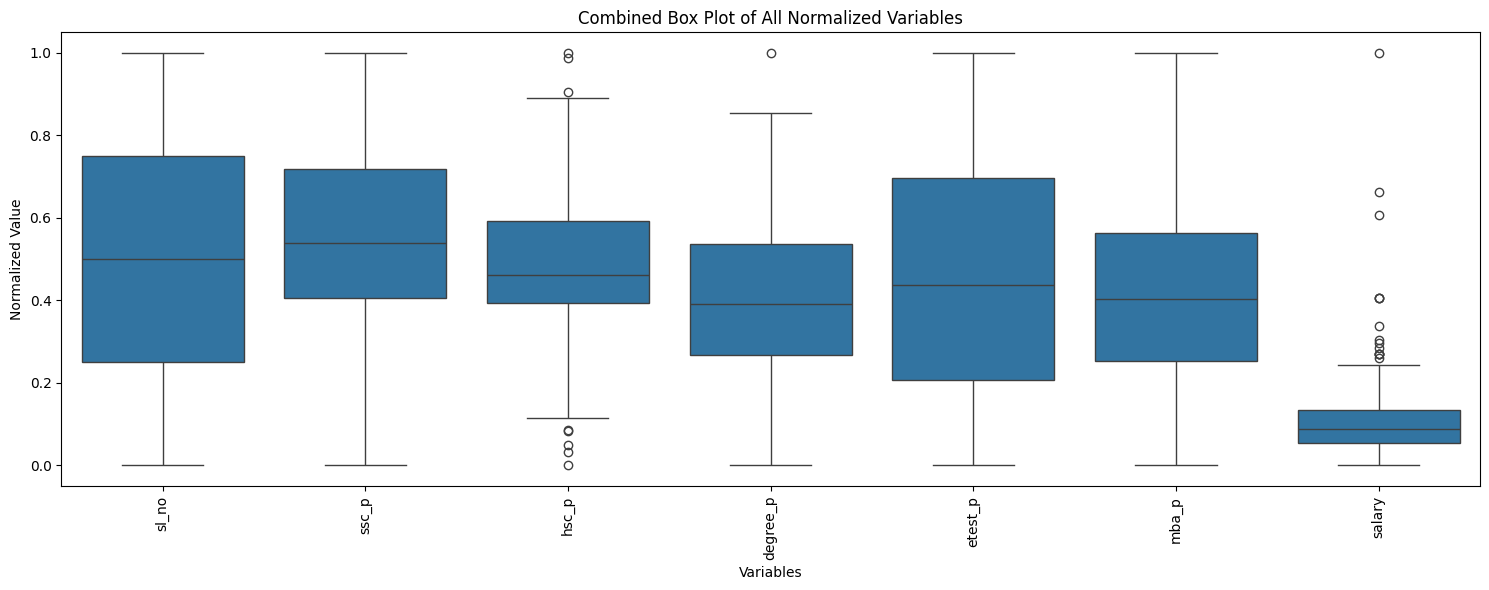

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
placement_data = pd.read_csv('Placement_Data_Full_Class.csv')  # Adjust the path if necessary

# Separating numeric and categorical columns
numeric_columns = placement_data.select_dtypes(include=[np.number]).columns
categorical_columns = placement_data.select_dtypes(exclude=[np.number]).columns

# Normalizing numeric columns using Min-Max Scaler
scaler = MinMaxScaler()
placement_data_normalized = scaler.fit_transform(placement_data[numeric_columns])
placement_data_normalized = pd.DataFrame(placement_data_normalized, columns=numeric_columns)

# Combining all normalized numeric columns into a single DataFrame for plotting
placement_data_melted = pd.melt(placement_data_normalized)

# Plotting the combined box plot
plt.figure(figsize=(15, 6))
sns.boxplot(x='variable', y='value', data=placement_data_melted)
plt.xticks(rotation=90)  # Rotates X-axis labels for better readability
plt.title('Combined Box Plot of All Normalized Variables')
plt.xlabel('Variables')
plt.ylabel('Normalized Value')
plt.tight_layout()
plt.show()


This code loads a dataset using Pandas, separates the columns into numeric and categorical columns, and then normalizes the numeric columns using Min-Max scaling. Afterward, it creates a single figure with multiple subplots to display box plots for each column in the dataset using Seaborn and Matplotlib.

1. Import the necessary libraries: Pandas, Matplotlib, Seaborn, and `MinMaxScaler` from Scikit-Learn.

2. Load a dataset named 'Placement_Data_Full_Class.csv' using Pandas and store it in the variable `placement_data`. Make sure to adjust the file path if necessary to match the location of your CSV file.

3. Separate the dataset into numeric and categorical columns. `numeric_columns` contains the names of numeric columns, and `categorical_columns` contains the names of categorical columns.

4. Create an instance of `MinMaxScaler` named `scaler` to normalize the numeric columns.

5. Normalize the numeric columns in `placement_data` using the `fit_transform` method of the `scaler`. This scales the values of numeric columns to the range [0, 1].

6. Create a single figure using `plt.figure(figsize=(15, 10))` with a specified figure size.

7. Loop through each column in `placement_data` using a `for` loop, where `i` is the index of the current column.

8. Inside the loop, use `plt.subplot` to create subplots in a grid layout. The number of rows and columns is determined by `len(placement_data.columns) // 2 + len(placement_data.columns) % 2`, which calculates the number of rows and columns needed to display all columns. The `i + 1` argument specifies the current subplot to focus on.

9. For each subplot, create a box plot using `sns.boxplot` with `y=placement_data[column]`, which displays the box plot for the values in the current column.

10. Set the title of each subplot to indicate which column it represents, e.g., "Box Plot of Salary" for the salary column.

11. Use `plt.tight_layout()` to ensure that the subplots are properly arranged within the figure.

12. Finally, display the figure containing all the box plots using `plt.show()`.

This code will generate a single figure with multiple subplots, each displaying a box plot for one of the columns in the dataset. It allows to visualize the distribution of data and identify potential outliers after normalizing the numeric columns.

**Heatmap & Pairing Plot of Correlation**

<ipython-input-10-bd19c2aeb088>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = placement_data.corr()


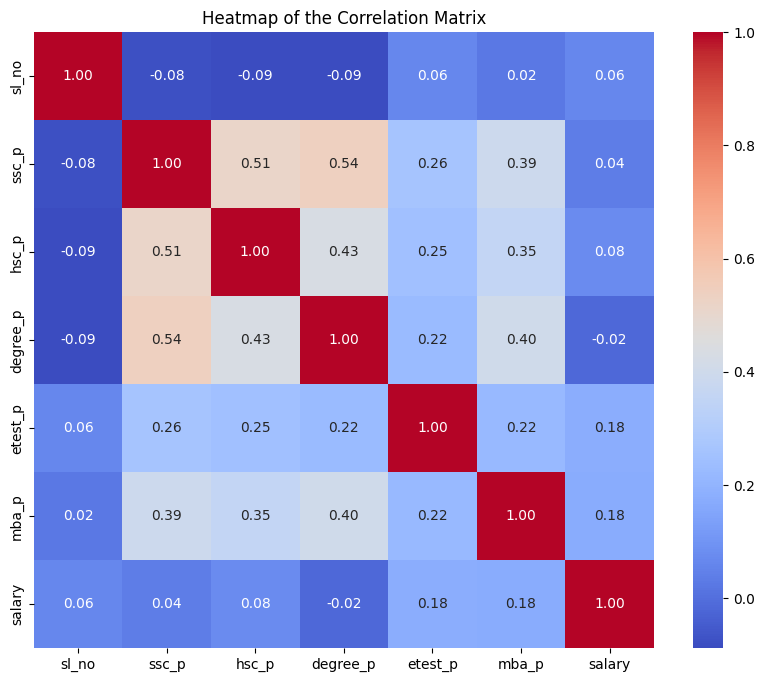

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
placement_data = pd.read_csv('Placement_Data_Full_Class.csv')

# Calculate the correlation matrix
corr_matrix = placement_data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of the Correlation Matrix')
plt.show()


The provided code loads a dataset using Pandas, calculates the correlation matrix between the numeric columns, and then generates a heatmap to visualize the correlation values between these columns. This can help you identify relationships between variables in your dataset.

1. Import the necessary libraries: Pandas, Seaborn, and Matplotlib.

2. Load a dataset named 'Placement_Data_Full_Class.csv' using Pandas and store it in the variable `placement_data`. Ensure that the file path is correct based on the location of your CSV file.

3. Calculate the correlation matrix of the numeric columns in `placement_data` using the `.corr()` method. This matrix contains correlation coefficients between pairs of numeric columns, indicating the strength and direction of their linear relationships.

4. Create a figure for the heatmap using `plt.figure(figsize=(10, 8))` with a specified figure size.

5. Generate the heatmap using `sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')`:
   - `corr_matrix` is the correlation matrix you calculated earlier.
   - `annot=True` adds numeric values to the cells of the heatmap.
   - `fmt='.2f'` specifies that the numeric values should be displayed with two decimal places.
   - `cmap='coolwarm'` sets the color map for the heatmap to a cool-warm color scheme.

6. Set the title of the heatmap to indicate that it represents the correlation matrix.

7. Finally, display the heatmap using `plt.show()`.

The resulting heatmap will visually represent the correlation between pairs of numeric variables in your dataset. Positive correlations are typically displayed in warmer colors, negative correlations in cooler colors, and weaker correlations closer to zero in shades of gray. This visualization can help identify which variables are strongly correlated, which can be useful for feature selection and understanding relationships within your data.

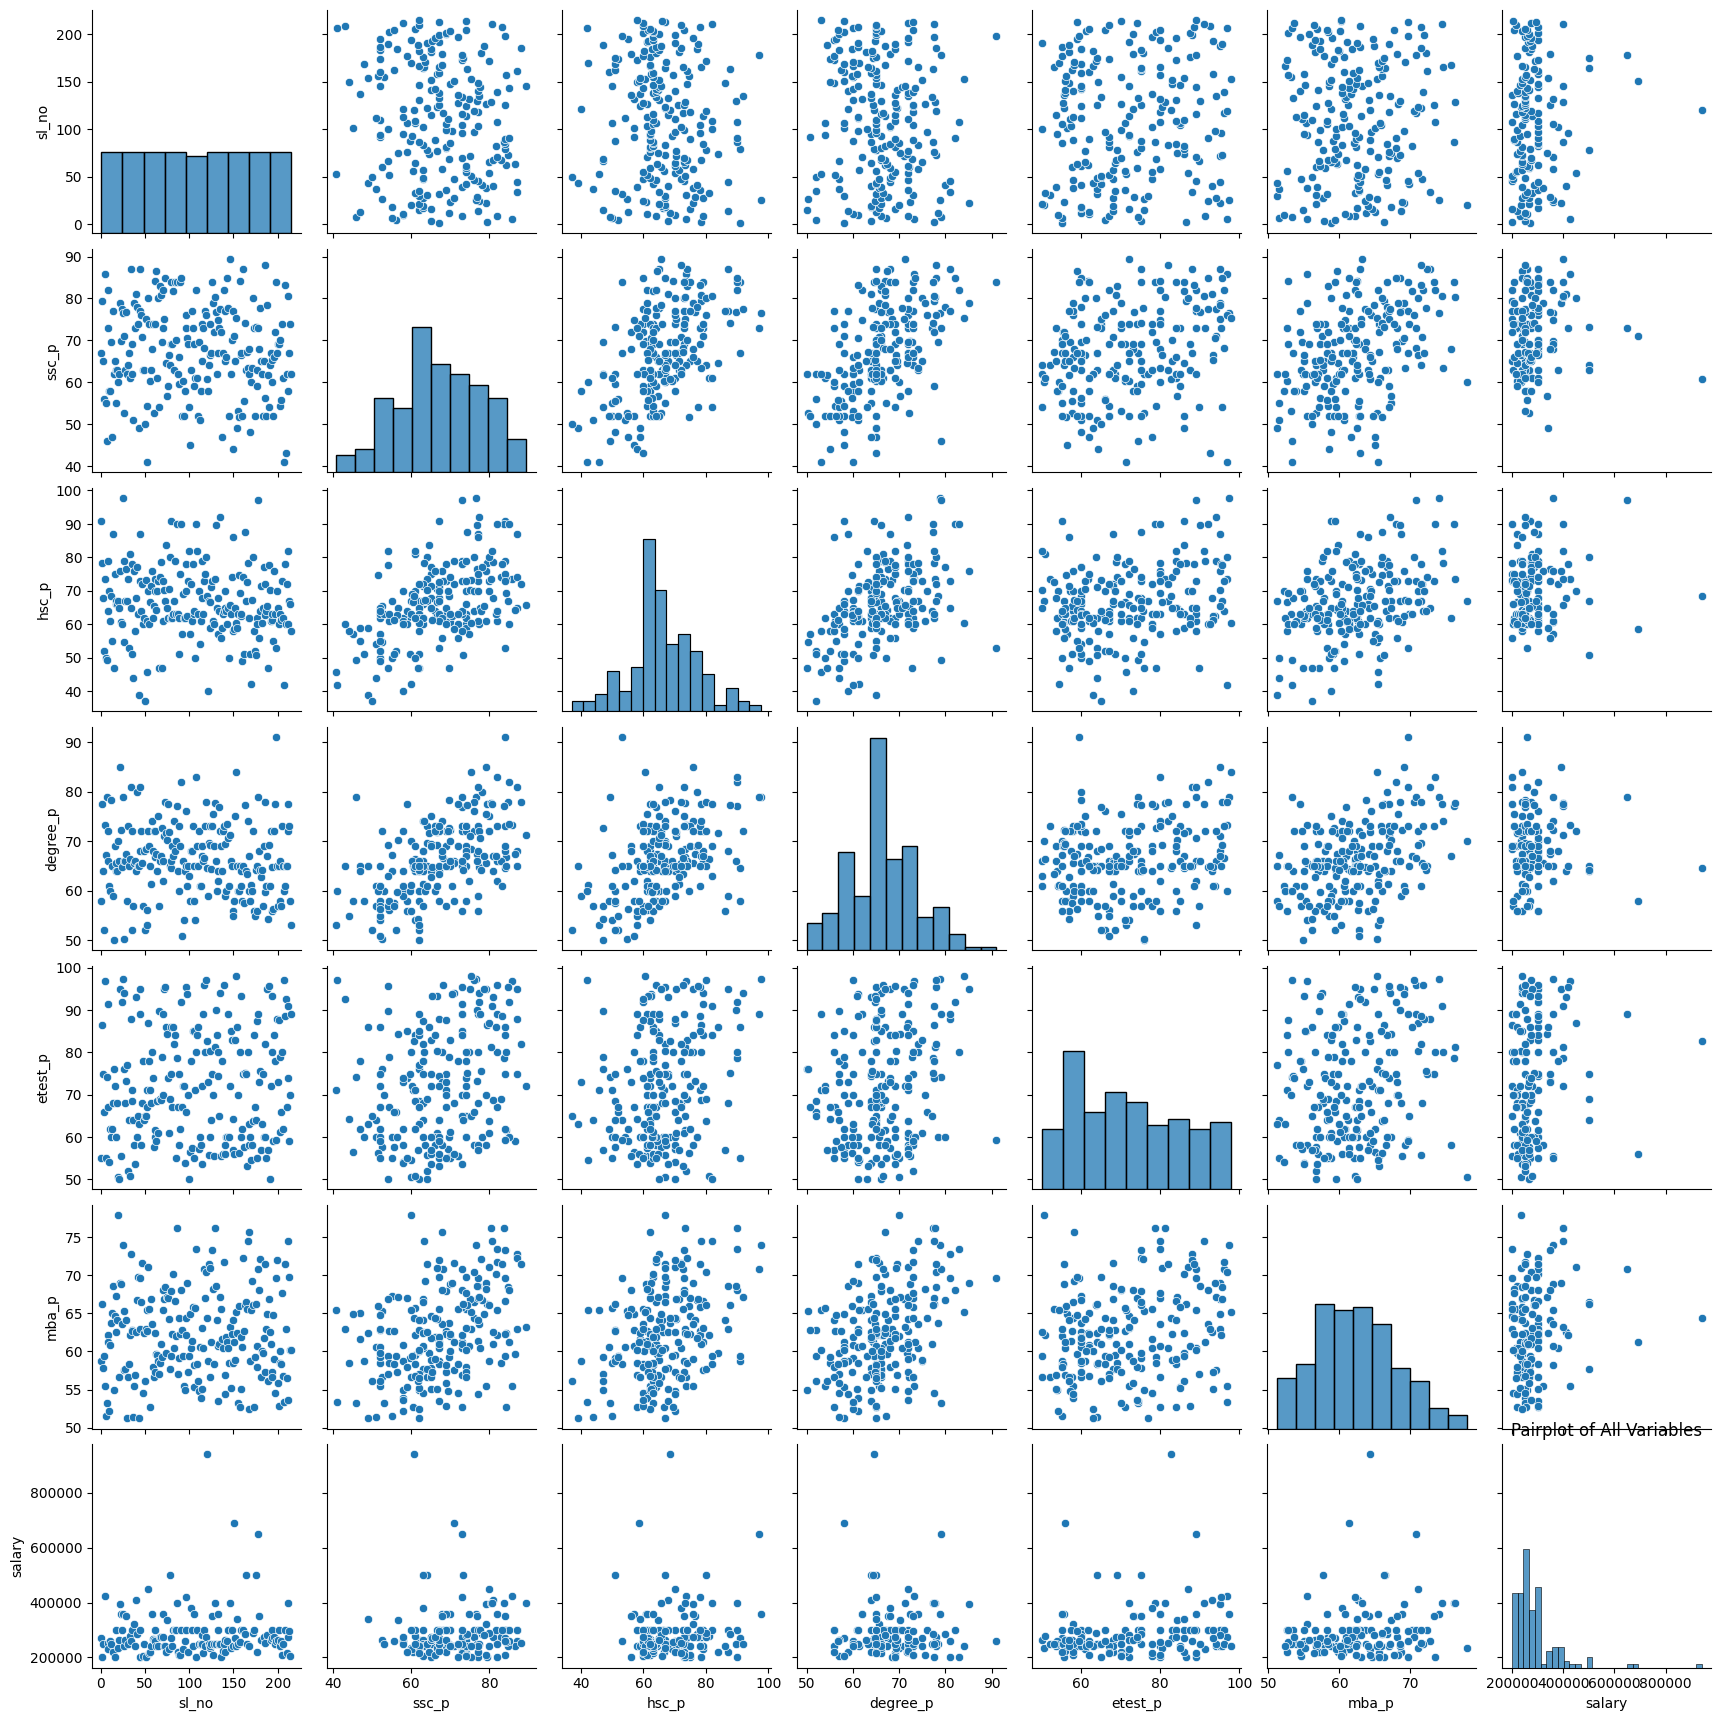

In [ ]:
import pandas as pd
import seaborn as sns

# Load the dataset
placement_data = pd.read_csv('Placement_Data_Full_Class.csv')

# Create a pair plot
sns.pairplot(placement_data)
plt.title('Pairplot of All Variables')
plt.show()


The provided code loads a dataset using Pandas and creates a pair plot using Seaborn's `pairplot` function. A pair plot is a grid of scatterplots that visualizes pairwise relationships between numeric variables in a dataset. It's a useful tool for gaining insights into the relationships and distributions of variables.

1. Import the necessary libraries: Pandas and Seaborn.

2. Load a dataset named 'Placement_Data_Full_Class.csv' using Pandas and store it in the variable `placement_data`. Make sure to adjust the file path if necessary to match the location of your CSV file.

3. Create a pair plot using `sns.pairplot(placement_data)`. This function generates scatterplots for all pairwise combinations of numeric columns in the dataset.

4. Set the title of the pair plot to indicate that it represents a pair plot of all variables using `plt.title('Pairplot of All Variables')`.

5. Finally, display the pair plot using `plt.show()`.

The resulting pair plot will show scatterplots for each pair of numeric variables in your dataset, allowing you to visually explore relationships, correlations, and distributions. The diagonal of the pair plot will typically display histograms or kernel density plots for individual variables. This visualization can be particularly helpful for identifying patterns and potential insights in your data.

**Identifying Predictor Significance Using OLS**




In [80]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
placement_data = pd.read_csv('Placement_Data_Full_Class.csv')

# Preprocess the data: Fill missing values and convert categorical variables to dummy variables
placement_data.fillna(placement_data.mean(), inplace=True)  # Handling missing values with mean imputation
placement_data_dummies = pd.get_dummies(placement_data.drop(['sl_no', 'salary'], axis=1))

# Define the target variable and independent variables
target = 'status_Placed'
X = placement_data_dummies.drop(target, axis=1)
y = placement_data_dummies[target]

# Adding a constant to the model (intercept)
X_with_constant = sm.add_constant(X)

# Fit an OLS model
model = sm.OLS(y, X_with_constant)
results = model.fit()

# Summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          status_Placed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.594e+28
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:52:11   Log-Likelihood:                 6677.2
No. Observations:                 215   AIC:                        -1.332e+04
Df Residuals:                     199   BIC:                        -1.327e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

<ipython-input-80-7ed7aa7a3a1b>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  placement_data.fillna(placement_data.mean(), inplace=True)  # Handling missing values with mean imputation


The provided code performs multiple steps related to regression modeling using the StatsModels library in Python. It includes loading a dataset, preprocessing the data, defining target and independent variables, adding a constant term (intercept), fitting an Ordinary Least Squares (OLS) regression model, and then printing the summary of the model results.

1. Import the necessary libraries: Pandas for data handling and StatsModels (`statsmodels.api`) for performing regression analysis.

2. Load a dataset named 'Placement_Data_Full_Class.csv' using Pandas and store it in the variable `placement_data`. Ensure that the file path is correct based on the location of your CSV file.

3. Preprocess the data by filling missing values with the mean of each respective column. This is done using `fillna(placement_data.mean(), inplace=True)`, which imputes missing values in numeric columns with their mean.

4. Create dummy variables for categorical columns in the dataset, excluding the 'sl_no' and 'salary' columns. This is achieved using `pd.get_dummies(placement_data.drop(['sl_no', 'salary'], axis=1))`. Dummy encoding converts categorical variables into binary (0 or 1) columns for each category.

5. Define the target variable `y` and the independent variables `X`. In this case, it appears that the target variable is 'status_Placed' (assuming 'Placed' is one of the categories in the 'status' column after dummy encoding), and the independent variables are all the other columns in `placement_data_dummies` except for 'status_Placed'.

6. Add a constant term (intercept) to the model by using `sm.add_constant(X)`. This is common practice in regression analysis to include an intercept term in the model equation.

7. Fit an Ordinary Least Squares (OLS) regression model using `sm.OLS(y, X_with_constant)`. OLS is a method for estimating the coefficients of a linear regression model.

8. Store the results of the fitted model in the `results` variable by calling `model.fit()`.

9. Print a summary of the regression model using `results.summary()`. This provides detailed information about the model's coefficients, statistical significance, goodness-of-fit measures, and more.

This code essentially performs linear regression analysis to model the relationship between the independent variables and the binary target variable 'status_Placed' while handling missing values and categorical variables through dummy encoding. The summary output will provide insights into the significance of each independent variable and the overall performance of the model.

**Building the Model with Train, Validation, and Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Building the Logistic Regression model (as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating the model on the validation set
y_val_pred = model.predict(X_val)
print("Validation Set Evaluation")
print(classification_report(y_val, y_val_pred))
print("Accuracy:", accuracy_score(y_val, y_val_pred))

# Final evaluation on the test set
y_test_pred = model.predict(X_test)
print("\nTest Set Evaluation")
print(classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))


Validation Set Evaluation
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.93      1.00      0.97        28

    accuracy                           0.95        43
   macro avg       0.97      0.93      0.95        43
weighted avg       0.96      0.95      0.95        43

Accuracy: 0.9534883720930233

Test Set Evaluation
              precision    recall  f1-score   support

           0       0.93      0.72      0.81        18
           1       0.83      0.96      0.89        25

    accuracy                           0.86        43
   macro avg       0.88      0.84      0.85        43
weighted avg       0.87      0.86      0.86        43

Accuracy: 0.8604651162790697


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The provided code performs the following steps for building and evaluating a logistic regression model using the scikit-learn library:

1. Import the necessary libraries: `train_test_split` for data splitting, `LogisticRegression` for building the logistic regression model, and `classification_report` and `accuracy_score` for model evaluation.

2. Split the dataset into training, validation, and test sets using `train_test_split`. The data is divided into the following sets:
   - `X_train` and `y_train`: Training set (60% of the data)
   - `X_val` and `y_val`: Validation set (20% of the data)
   - `X_test` and `y_test`: Test set (20% of the data)

   The `random_state` parameter is set to 42 for reproducibility.

3. Build a logistic regression model by creating an instance of `LogisticRegression()` and fitting it to the training data using `model.fit(X_train, y_train)`.

4. Evaluate the model's performance on the validation set:
   - Make predictions on the validation set using `model.predict(X_val)` and store the results in `y_val_pred`.
   - Print a classification report using `classification_report` to display precision, recall, F1-score, and support for each class in the validation set.
   - Calculate and print the accuracy on the validation set using `accuracy_score`.

5. Finally, evaluate the model's performance on the test set:
   - Make predictions on the test set using `model.predict(X_test)` and store the results in `y_test_pred`.
   - Print a classification report for the test set using `classification_report` to display precision, recall, F1-score, and support for each class.
   - Calculate and print the accuracy on the test set using `accuracy_score`.

This code provides a basic example of how to split your data into training, validation, and test sets, build a logistic regression model, and evaluate its performance using common classification metrics. Depending on your specific problem and dataset, you may want to consider additional steps such as hyperparameter tuning, feature selection, or other model evaluation techniques.

**Plotting the Data to see the Histogram**

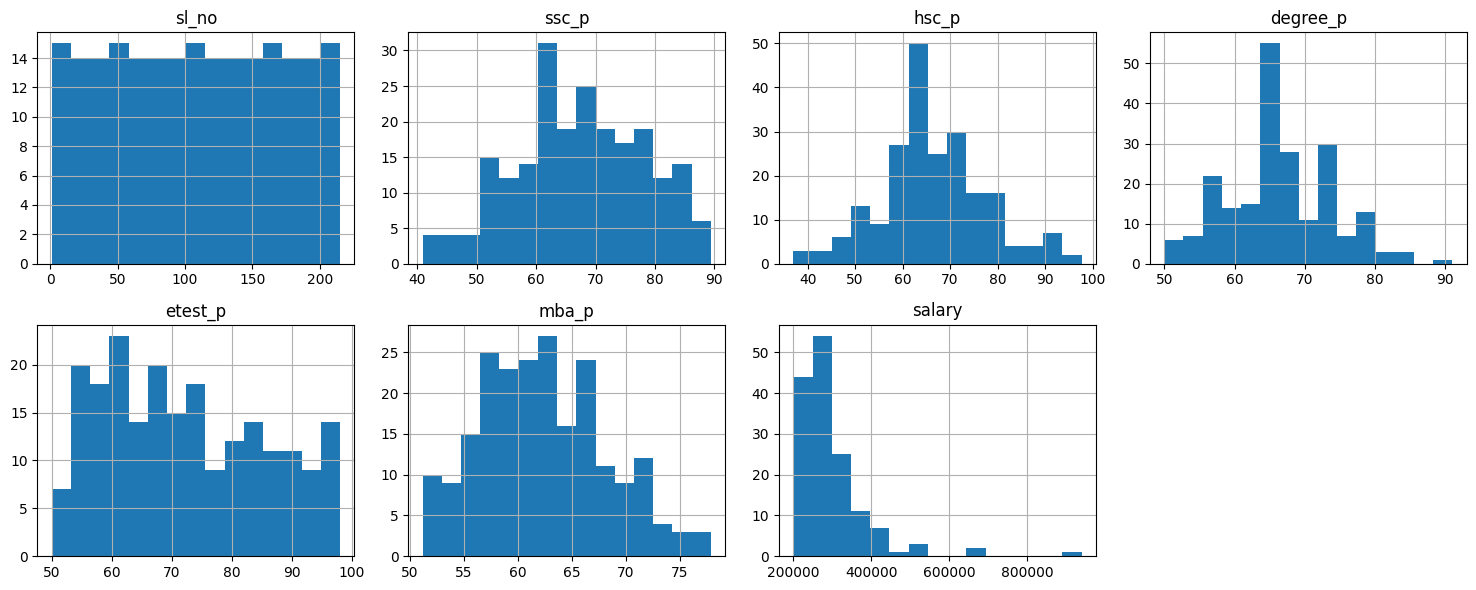

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
placement_data = pd.read_csv('Placement_Data_Full_Class.csv')

# Plot histograms for all numeric features
numeric_columns = placement_data.select_dtypes(include=[np.number]).columns
placement_data[numeric_columns].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.tight_layout()
plt.show()


**Linear Regression and Making Predictions**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'salary' is the target variable and using only numeric predictors for simplicity
numeric_predictors = placement_data.select_dtypes(include=[np.number]).drop(['sl_no', 'salary'], axis=1)
X = numeric_predictors.fillna(numeric_predictors.mean())  # Handling missing values with mean imputation
y = placement_data['salary'].fillna(placement_data['salary'].mean())  # Handling missing values

# Split the data into training/testing/validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the training set
y_train_pred = regr.predict(X_train)
print("Mean squared error (Train): %.2f" % mean_squared_error(y_train, y_train_pred))
print("Coefficient of determination (Train): %.2f" % r2_score(y_train, y_train_pred))

# Make predictions using the testing set
y_test_pred = regr.predict(X_test)
print("Mean squared error (Test): %.2f" % mean_squared_error(y_test, y_test_pred))
print("Coefficient of determination (Test): %.2f" % r2_score(y_test, y_test_pred))

# Make predictions using the validation set
y_val_pred = regr.predict(X_val)
print("Mean squared error (Validation): %.2f" % mean_squared_error(y_val, y_val_pred))
print("Coefficient of determination (Validation): %.2f" % r2_score(y_val, y_val_pred))


Mean squared error (Train): 6897321235.37
Coefficient of determination (Train): 0.07
Mean squared error (Test): 6026058178.92
Coefficient of determination (Test): -0.13
Mean squared error (Validation): 2238385843.90
Coefficient of determination (Validation): 0.01


The provided code performs linear regression modeling using the scikit-learn library and includes the following steps:

1. Import the necessary libraries: `train_test_split` for data splitting, `LinearRegression` for building the linear regression model, and `mean_squared_error` and `r2_score` for model evaluation.

2. Prepare the data:
   - Select numeric predictors (independent variables) from the dataset by using `placement_data.select_dtypes(include=[np.number])`. The 'sl_no' and 'salary' columns are excluded from the predictors.
   - Handle missing values in the predictor variables by filling them with the mean of their respective columns using `fillna(numeric_predictors.mean())`.
   - Prepare the target variable 'salary' by filling missing values with the mean salary using `placement_data['salary'].fillna(placement_data['salary'].mean())`.

3. Split the data into training, testing, and validation sets:
   - Split the data into a training set (60%), a validation set (20%), and a test set (20%) using `train_test_split`. The `random_state` parameter is set to 42 for reproducibility.

4. Create a linear regression model object using `LinearRegression()`.

5. Train the linear regression model using the training data:
   - Fit the model to the training data using `regr.fit(X_train, y_train)`.

6. Make predictions using the training, testing, and validation sets:
   - Predict the target variable 'salary' for the training set using `regr.predict(X_train)` and store the predictions in `y_train_pred`.
   - Calculate and print the mean squared error and the coefficient of determination (R-squared) for the training set.
   - Predict the target variable 'salary' for the test set using `regr.predict(X_test)` and store the predictions in `y_test_pred`.
   - Calculate and print the mean squared error and the coefficient of determination (R-squared) for the test set.
   - Predict the target variable 'salary' for the validation set using `regr.predict(X_val)` and store the predictions in `y_val_pred`.
   - Calculate and print the mean squared error and the coefficient of determination (R-squared) for the validation set.

This code performs linear regression modeling to predict 'salary' based on the selected numeric predictor variables. It evaluates the model's performance on the training, testing, and validation sets using mean squared error and R-squared. These metrics provide insights into how well the model fits the data and its predictive performance on unseen data.

**Understanding the Important Features with Permutation**


In [ ]:
import eli5
from sklearn.ensemble import RandomForestRegressor

# Train the model (using RandomForestRegressor for continuous target)
rf_regressor = RandomForestRegressor(random_state=42).fit(X_train, y_train)

# Perform Permutation Importance
perm = PermutationImportance(rf_regressor, random_state=1).fit(X_val, y_val)

# Displaying the importance of features
eli5.show_weights(perm, feature_names = X_val.columns.tolist())



Weight,Feature
0.3523 ± 0.1828,mba_p
0.1289 ± 0.1393,hsc_p
0.1118 ± 0.3267,etest_p
0.0935 ± 0.5270,ssc_p
0.0394 ± 0.2380,degree_p


The provided code performs feature importance analysis using permutation importance with a RandomForestRegressor model. This analysis helps identify the importance of each feature in making predictions with the model. Here's a breakdown of the code:

1. Import the necessary libraries:
   - `eli5`: This library is used to perform feature importance analysis.
   - `RandomForestRegressor`: This is the model used for regression.

2. Train a RandomForestRegressor model (`rf_regressor`) using the training data:
   - `RandomForestRegressor(random_state=42)` creates an instance of the random forest regressor with a specified random seed (for reproducibility).
   - `rf_regressor.fit(X_train, y_train)` trains the model on the training data (`X_train` as predictors and `y_train` as the target variable).

3. Perform permutation importance using the `PermutationImportance` method from the `eli5` library:
   - `PermutationImportance(rf_regressor, random_state=1)` creates an instance of the permutation importance estimator, using the trained random forest regressor (`rf_regressor`) as the model.
   - `perm.fit(X_val, y_val)` computes permutation importance scores for each feature using the validation data (`X_val` and `y_val`).

4. Display the importance of features using `eli5.show_weights`:
   - `eli5.show_weights(perm, feature_names=X_val.columns.tolist())` displays the feature importance scores calculated by the permutation importance. It shows how much each feature contributes to the model's performance.

The output will provide a list of features and their importance scores. Features with higher scores are more important in making predictions, while features with lower scores are less influential. This information can be helpful for feature selection, understanding the model's behavior, and identifying which predictors have the most impact on the target variable.

**Likely Distributions of Numeric Variables**

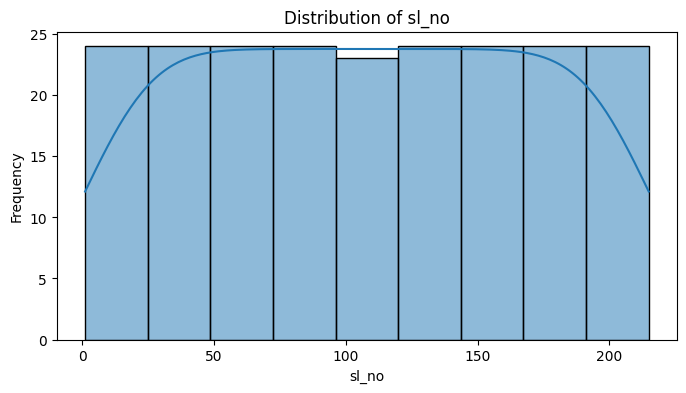

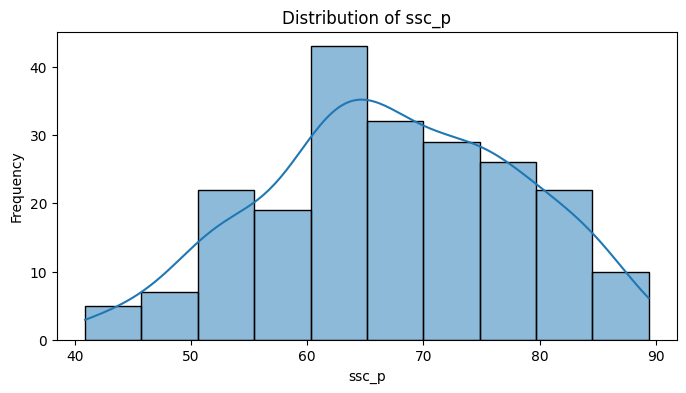

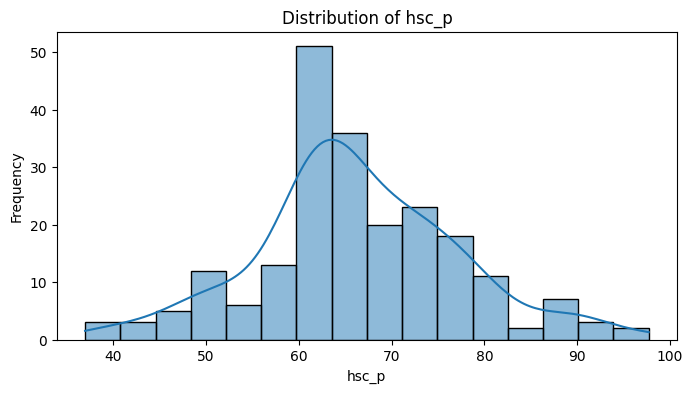

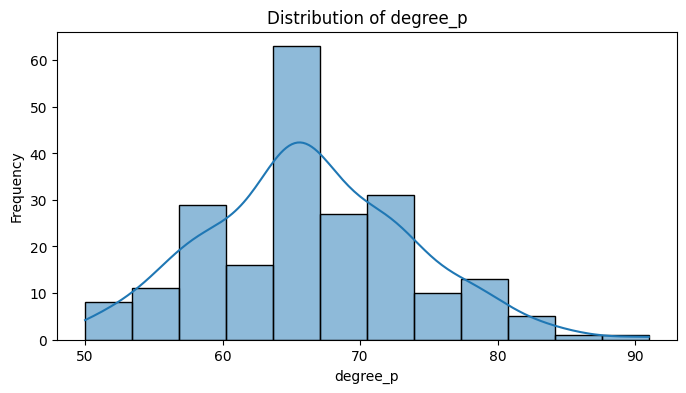

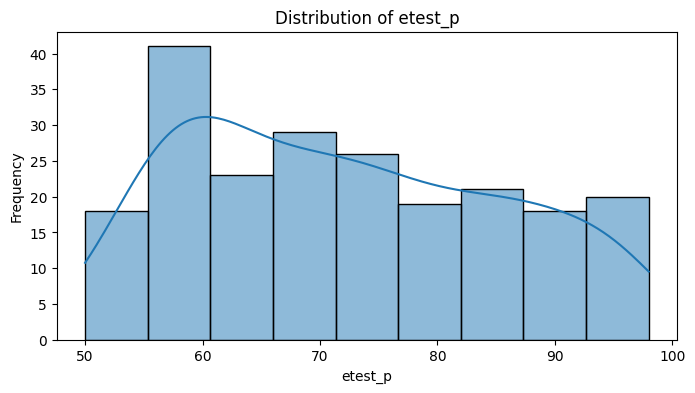

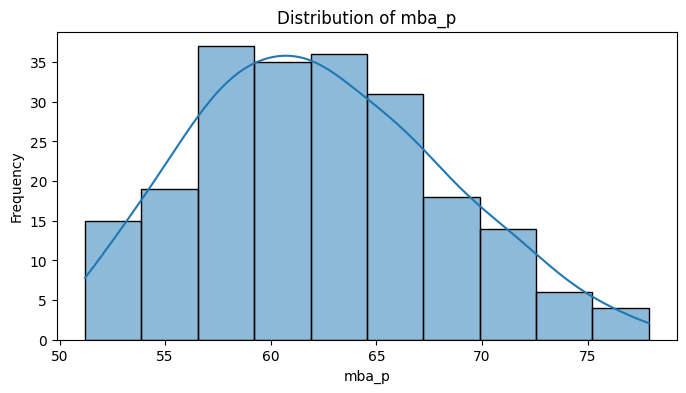

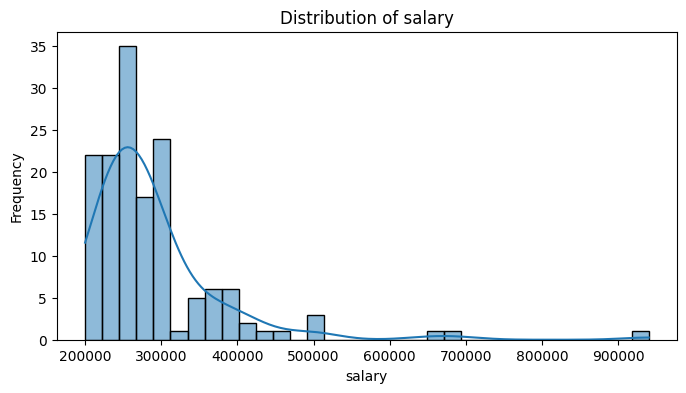

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions of numeric variables
for column in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

The code I have provided generates histograms with kernel density estimates (KDE) to visualize the distributions of numeric variables. It uses Matplotlib for creating the plots and Seaborn for enhancing the visual appearance of the histograms. Here's a breakdown of the code:

1. Import the necessary libraries: `matplotlib.pyplot` as `plt` and `seaborn` as `sns`.

2. Iterate through each column in the `numeric_data` DataFrame (assuming you have already defined and populated `numeric_data` with your numeric variables).

3. For each numeric variable, create a new figure (plot) with a specified figure size using `plt.figure(figsize=(8, 4))`.

4. Generate a histogram with a KDE overlay using `sns.histplot(numeric_data[column], kde=True)`. This function from Seaborn creates a histogram and adds a smoothed KDE curve on top to provide a better understanding of the data distribution.

5. Set the title of the plot to indicate which column's distribution is being displayed, such as "Distribution of Salary" for the salary column, using `plt.title(f'Distribution of {column}')`.

6. Label the x-axis with the column name using `plt.xlabel(column)`.

7. Label the y-axis as 'Frequency' using `plt.ylabel('Frequency')`.

8. Display the plot using `plt.show()`.

This code will produce a series of histograms with KDE overlays, one for each numeric variable in your dataset. It allows you to visually explore the distribution of each variable and gain insights into its shape, central tendency, and spread. Histograms with KDEs are useful for understanding data distributions, identifying potential outliers, and assessing normality assumptions.

In [ ]:
# Print the column names
print(data.columns)


Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')


**Predicting Target Variable using 3 Methods**

**Correlation Analysis**

<ipython-input-20-6d3baee8183f>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


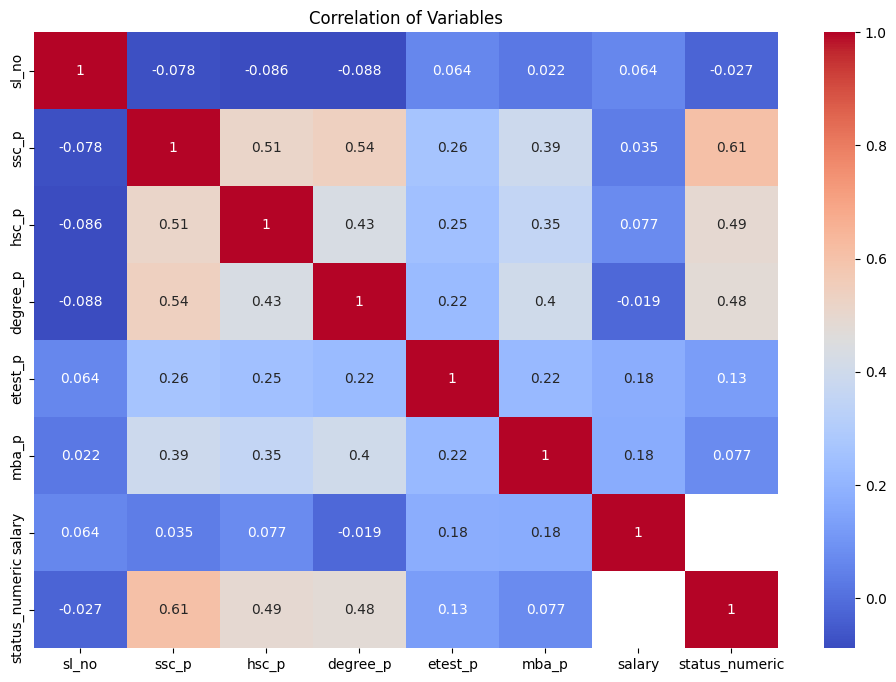

Correlation with the target variable:
 status_numeric    1.000000
ssc_p             0.607889
hsc_p             0.491228
degree_p          0.479861
etest_p           0.127639
mba_p             0.076922
sl_no            -0.026859
salary                 NaN
Name: status_numeric, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting 'status' as the target variable
target_variable = 'status'

# Since 'status' is likely categorical, we need to convert it to numerical for correlation analysis
# Assuming 'status' has values like 'Placed' and 'Not Placed'
data['status_numeric'] = data['status'].apply(lambda x: 1 if x == 'Placed' else 0)

# Correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation of Variables")
plt.show()

# Correlations with the target variable
correlation_with_target = correlation_matrix['status_numeric'].sort_values(ascending=False)
print("Correlation with the target variable:\n", correlation_with_target)


The provided code performs correlation analysis between the target variable 'status' (assumed to be categorical with values 'Placed' and 'Not Placed') and other numeric variables in the dataset. It visualizes the correlation matrix as a heatmap and prints the correlations between variables and the target variable. Here's a breakdown of the code:

1. Import the necessary libraries: `seaborn` as `sns` and `matplotlib.pyplot` as `plt`.

2. Specify the target variable as 'status' using `target_variable = 'status'`.

3. Convert the categorical 'status' variable into a binary numeric variable 'status_numeric' by mapping 'Placed' to 1 and 'Not Placed' to 0. This conversion is done using `data['status'].apply(lambda x: 1 if x == 'Placed' else 0)`.

4. Calculate the correlation matrix for all numeric variables in the dataset using `data.corr()`.

5. Create a heatmap of the correlation matrix using Seaborn's `sns.heatmap`:
   - `annot=True` adds numeric values to the heatmap cells.
   - `cmap='coolwarm'` sets the color map for the heatmap.

6. Set the title of the heatmap to indicate that it represents the correlation of variables using `plt.title("Correlation of Variables")`.

7. Display the heatmap using `plt.show()`.

8. Calculate the correlations between the target variable ('status_numeric') and all other variables in the correlation matrix using `correlation_matrix['status_numeric'].sort_values(ascending=False)`. This provides a sorted list of correlations in descending order.

9. Print the correlations with the target variable using `print("Correlation with the target variable:\n", correlation_with_target)`.

This code will visually represent the correlations between the target variable 'status' (converted to 'status_numeric') and all other numeric variables in the dataset. It helps you identify which variables are most strongly related to the target variable and may be relevant for predicting the outcome of 'status' (e.g., 'Placed' or 'Not Placed'). Positive values indicate a positive correlation, while negative values indicate a negative correlation.

**Feature Importance from a Tree-Based Model**

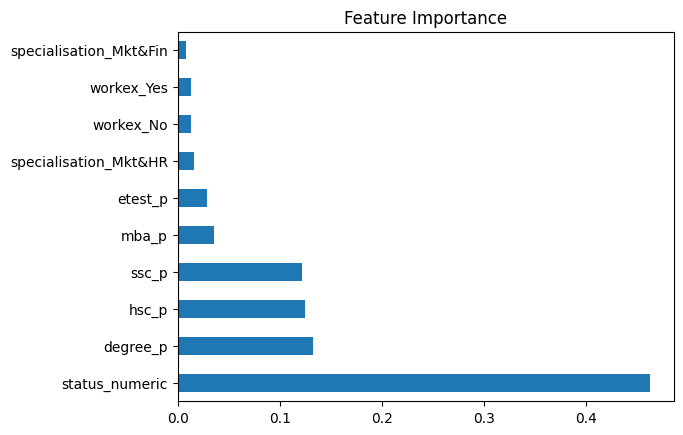

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Preparing the data
X = data.drop(['status', 'salary', 'sl_no'], axis=1)  # Drop 'salary' if it's not your target variable
y = data['status'].apply(lambda x: 1 if x == 'Placed' else 0)

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')  # Adjust the number to display as needed
plt.title("Feature Importance")
plt.show()


The provided code performs feature importance analysis using a Random Forest Classifier for a classification problem. It helps identify which features are most important in making predictions with the model.

1. Import the necessary libraries: `RandomForestClassifier` from scikit-learn (`sklearn`), `train_test_split` for data splitting, `pandas` as `pd`, and `matplotlib.pyplot` as `plt`.

2. Prepare the data:
   - Define the predictor variables (`X`) by dropping columns 'status', 'salary', and 'sl_no' from the dataset using `data.drop(['status', 'salary', 'sl_no'], axis=1)`. You can drop 'salary' if it's not your target variable.
   - Define the target variable (`y`) by applying a lambda function to map 'Placed' to 1 and other values to 0 using `data['status'].apply(lambda x: 1 if x == 'Placed' else 0)`.

3. Convert categorical variables to dummy variables using `pd.get_dummies(X)`. This step is essential for handling categorical variables in the machine learning model.

4. Split the data into training and test sets using `train_test_split`:
   - `X_train` and `y_train`: Training data (70% of the data)
   - `X_test` and `y_test`: Test data (30% of the data)
   - The `random_state` parameter is set to 42 for reproducibility.

5. Create a Random Forest Classifier model using `RandomForestClassifier(random_state=42)`.

6. Train the Random Forest model on the training data using `model.fit(X_train, y_train)`.

7. Calculate feature importance scores using the `feature_importances_` attribute of the trained model. These scores represent the importance of each feature in making predictions.

8. Create a `pd.Series` object (`feature_importance`) with feature importance scores as values and feature names as index.

9. Plot the top 10 most important features as a horizontal bar chart using `feature_importance.nlargest(10).plot(kind='barh')`. You can adjust the number of features to display by changing the value inside `nlargest()`.

10. Set the title of the bar chart to "Feature Importance" using `plt.title("Feature Importance")`.

11. Display the bar chart using `plt.show()`.

This code will generate a bar chart showing the relative importance of the top features in making predictions with the Random Forest Classifier. It helps you identify which features have the most impact on the classification outcomes.

In [ ]:
# Convert categorical variables to dummy variables
X_processed = pd.get_dummies(data.drop(['status', 'salary', 'sl_no'], axis=1))

# Print the number of features after processing
num_features = X_processed.shape[1]
print(f"Total number of features after processing: {num_features}")


Total number of features after processing: 22


**Recursive Feature Elimination (RFE)**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
model = LogisticRegression(max_iter=1000)

# RFE model, selecting 10 features
rfe = RFE(estimator=model, n_features_to_select=10)
fit = rfe.fit(X_processed, data['status'].apply(lambda x: 1 if x == 'Placed' else 0))

# Summarize the selection of the attributes
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))



Num Features: 10
Selected Features: [ True False False False False  True  True  True False False False False
 False False False  True False  True  True  True  True  True]
Feature Ranking: [ 1 10  6 13  4  1  1  1  8  9  3  5  2  7 11  1 12  1  1  1  1  1]


The code performs feature selection using Recursive Feature Elimination (RFE) with a Logistic Regression model. RFE is a technique to select a subset of the most important features from a larger set of features. Here's a breakdown of the code:

1. Import the necessary libraries: `RFE` from scikit-learn (`sklearn`) for feature selection and `LogisticRegression` for the logistic regression model.

2. Create a logistic regression model with the `LogisticRegression` class:
   
   model = LogisticRegression(max_iter=1000)
   
   - This logistic regression model is used as the estimator within the RFE feature selection process.

3. Initialize the RFE model (`rfe`) with the logistic regression model and specify the number of features to select (`n_features_to_select`). In this case, you are selecting 10 features:
   
   rfe = RFE(estimator=model, n_features_to_select=10)
   
   - The `estimator` parameter specifies the machine learning model used to evaluate feature importance.
   - The `n_features_to_select` parameter determines the number of features to retain after feature selection.

4. Fit the RFE model to your processed feature data (`X_processed`) and the target variable. The `fit` method is used to perform the feature selection:
   
   fit = rfe.fit(X_processed, data['status'].apply(lambda x: 1 if x == 'Placed' else 0))
   
   - `X_processed` is the input feature data.
   - `data['status'].apply(lambda x: 1 if x == 'Placed' else 0)` is used to encode the target variable 'status' as binary values (1 for 'Placed' and 0 for other values).

5. After fitting the RFE model, you can access the results:
   - `fit.n_features_` returns the number of selected features, which is 10 in this case.
   - `fit.support_` is a Boolean mask that indicates which features were selected (True) and which were not (False).
   - `fit.ranking_` provides the ranking of each feature, where lower values indicate higher importance.

6. Finally, you print out the number of selected features, the Boolean mask indicating selected features, and the ranking of features.

This code helps identify the top 10 features that the RFE algorithm has selected as the most important for the logistic regression model. Feature selection is essential for simplifying the model, reducing overfitting, and potentially improving model performance.

**Independent Variables having Missing Data**

In [ ]:
# Display columns with missing values along with the count
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)


salary    67
dtype: int64


The code is used to display columns in a DataFrame (`data`) that have missing values, along with the count of missing values for each column. Here's a breakdown of the code:

1. `missing_values = data.isnull().sum()`: This line calculates the total count of missing values for each column in the DataFrame `data`. It uses the `.isnull()` method to create a DataFrame of boolean values (True for missing values and False for non-missing values) and then applies `.sum()` to count the number of True values in each column.

2. `missing_values = missing_values[missing_values > 0]`: This line filters the `missing_values` Series to include only columns with a count of missing values greater than zero. In other words, it removes columns with no missing values from the result.

3. `print(missing_values)`: Finally, this line prints the filtered `missing_values` Series, which contains the column names with missing values and their respective counts. The output will show the column names and the number of missing values in each of those columns.

The code is useful for quickly identifying which columns in the dataset have missing data and how many missing values are present in each of those columns.

**Comparision of Training and Test Data**


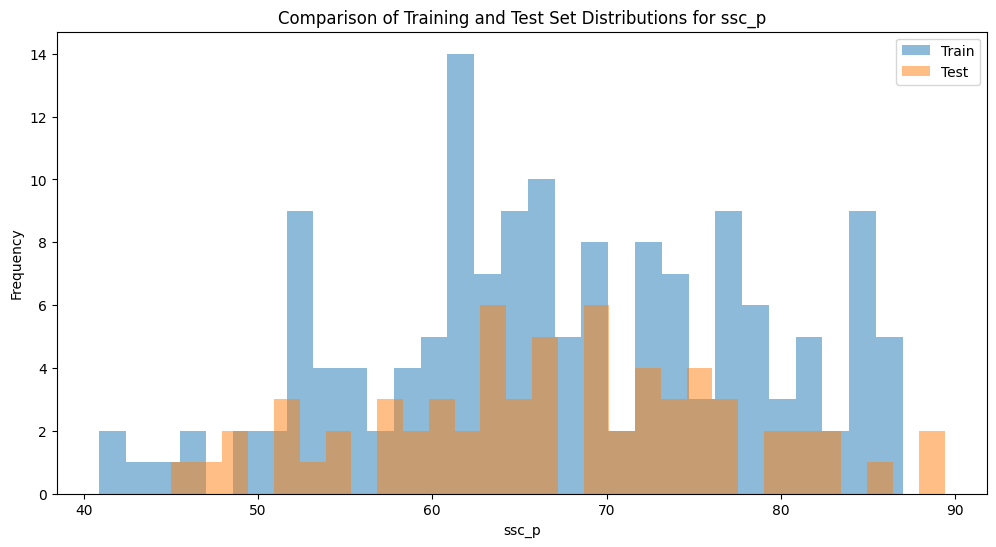

In [ ]:
import matplotlib.pyplot as plt

# Compare distributions for the 'ssc_p' column
plt.figure(figsize=(12, 6))
plt.hist(X_train['ssc_p'], bins=30, alpha=0.5, label='Train')
plt.hist(X_test['ssc_p'], bins=30, alpha=0.5, label='Test')
plt.title('Comparison of Training and Test Set Distributions for ssc_p')
plt.xlabel('ssc_p')
plt.ylabel('Frequency')
plt.legend()
plt.show()



Yes, training and test Sets have the similar Data

The code compares the distributions of the 'ssc_p' (Secondary Education percentage) column between the training and test sets using histograms. Here's a breakdown of the code:

1. Import the necessary library: `matplotlib.pyplot` as `plt`.

2. Create a new figure (plot) with a specified figure size using `plt.figure(figsize=(12, 6))`. This sets the size of the plot.

3. Generate histograms for the 'ssc_p' column in both the training and test sets:
   - `plt.hist(X_train['ssc_p'], bins=30, alpha=0.5, label='Train')` creates a histogram for the 'ssc_p' values in the training set (`X_train`). It specifies the number of bins as 30 (`bins=30`), the alpha value for transparency as 0.5 (`alpha=0.5`), and assigns the label 'Train' for the legend.
   - `plt.hist(X_test['ssc_p'], bins=30, alpha=0.5, label='Test')` creates a histogram for the 'ssc_p' values in the test set (`X_test`). It uses the same bin count, alpha value, and assigns the label 'Test' for the legend.

4. Set the title of the plot to indicate that it represents a comparison of the training and test set distributions for the 'ssc_p' column using `plt.title('Comparison of Training and Test Set Distributions for ssc_p')`.

5. Label the x-axis as 'ssc_p' using `plt.xlabel('ssc_p')`.

6. Label the y-axis as 'Frequency' using `plt.ylabel('Frequency')`.

7. Add a legend to the plot using `plt.legend()` to distinguish between the training and test sets.

8. Display the plot using `plt.show()`.

This code allows you to visually compare the distributions of the 'ssc_p' column between the training and test sets. It helps assess whether the two datasets have similar or different distributions for this particular feature. Differences in distributions can provide insights into potential issues related to dataset splitting and model generalization.

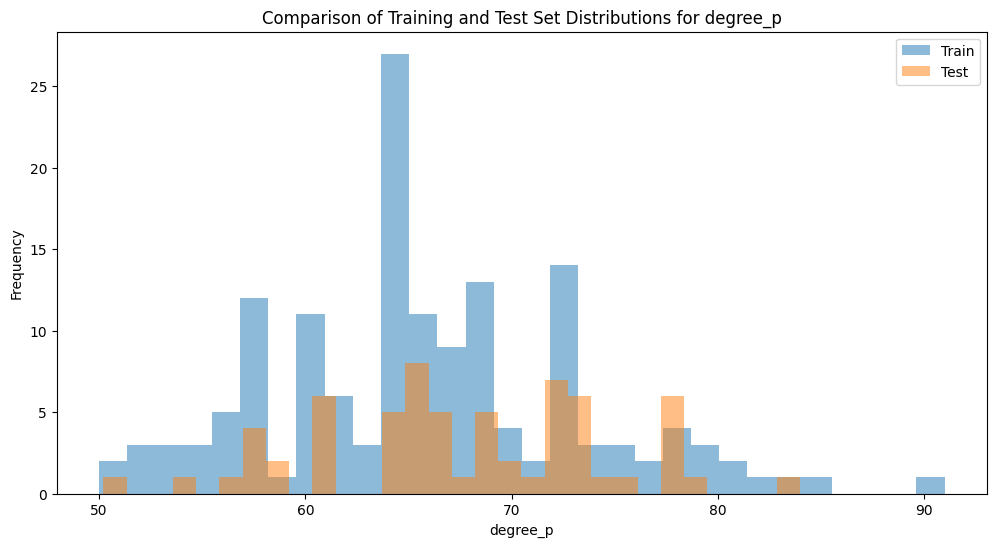

In [ ]:
import matplotlib.pyplot as plt

# Compare distributions for the 'degree_p' column
plt.figure(figsize=(12, 6))
plt.hist(X_train['degree_p'], bins=30, alpha=0.5, label='Train')
plt.hist(X_test['degree_p'], bins=30, alpha=0.5, label='Test')
plt.title('Comparison of Training and Test Set Distributions for degree_p')
plt.xlabel('degree_p')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The code generates a comparison of the distributions of the 'degree_p' column between the training and test datasets using a histogram. Here's a breakdown of what the code does:

1. `plt.figure(figsize=(12, 6))`: This line sets the figure size for the upcoming plot to 12 units in width and 6 units in height, creating a larger and more readable visualization.

2. `plt.hist(X_train['degree_p'], bins=30, alpha=0.5, label='Train')`: This line creates a histogram for the 'degree_p' column of the training dataset (`X_train`). It specifies several parameters:
   - `X_train['degree_p']`: The data to be plotted, which is the 'degree_p' column of the training dataset.
   - `bins=30`: The number of bins or intervals to divide the data into. In this case, it uses 30 bins.
   - `alpha=0.5`: The alpha parameter controls the transparency of the bars in the histogram. Setting it to 0.5 makes the bars semi-transparent.
   - `label='Train'`: This label is used to distinguish the training dataset in the legend.

3. `plt.hist(X_test['degree_p'], bins=30, alpha=0.5, label='Test')`: This line similarly creates a histogram for the 'degree_p' column of the test dataset (`X_test`) with the same parameters as the previous histogram. It distinguishes the test dataset with the label 'Test' in the legend.

4. `plt.title('Comparison of Training and Test Set Distributions for degree_p')`: This line sets the title of the plot to 'Comparison of Training and Test Set Distributions for degree_p'.

5. `plt.xlabel('degree_p')`: It labels the x-axis with 'degree_p', indicating the variable being plotted.

6. `plt.ylabel('Frequency')`: This labels the y-axis with 'Frequency', indicating the count of data points in each bin.

7. `plt.legend()`: This adds a legend to the plot, indicating which dataset is represented by each color (Train and Test).

8. `plt.show()`: Finally, this command displays the histogram plot with the specified settings.

In summary, the code generates two overlaid histograms, one for the 'degree_p' column in the training dataset and another for the test dataset. This allows for a visual comparison of the distribution of the 'degree_p' variable between the two datasets.

**The Predictor Variables Independent of All the Other Predictor Variables**

**Correlation Matrix**

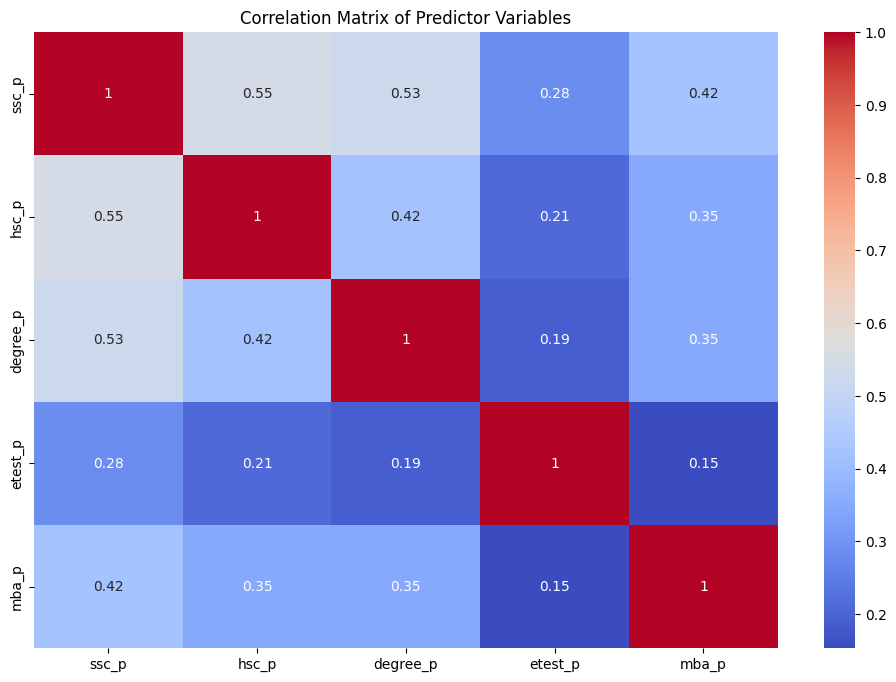

In [ ]:
# Correlation matrix for predictor variables
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Predictor Variables")
plt.show()


The code generates a correlation matrix heatmap for the predictor variables in the training set. This visualization helps you understand the relationships and correlations between different predictors. Here's a breakdown of the code:

1. Import the necessary libraries: `matplotlib.pyplot` as `plt` and `seaborn` as `sns`.

2. Create a new figure (plot) with a specified figure size using `plt.figure(figsize=(12, 8))`. This sets the size of the heatmap.

3. Generate a heatmap of the correlation matrix of the predictor variables using Seaborn's `sns.heatmap` function:
   - `X_train.corr()` computes the correlation matrix for the predictor variables in the training set (`X_train`).
   - `annot=True` adds numeric values to the heatmap cells to display the correlation coefficients.
   - `cmap='coolwarm'` sets the color map for the heatmap.

4. Set the title of the heatmap to indicate that it represents the correlation matrix of predictor variables using `plt.title("Correlation Matrix of Predictor Variables")`.

5. Display the heatmap using `plt.show()`.

This code provides a visual representation of the correlations between predictor variables in your training dataset. The colors and numeric values in the heatmap help you identify positive and negative correlations between different variables. Understanding these correlations can be useful for feature selection, identifying multicollinearity, and gaining insights into the relationships among predictors.

**Variance Inflation Factor (VIF)**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

print(vif_data)


                   feature       VIF
0                    ssc_p  2.815797
1                    hsc_p  2.130568
2                 degree_p  1.803663
3                  etest_p  1.316311
4                    mba_p  1.655637
5           status_numeric  2.421711
6                 gender_F       inf
7                 gender_M       inf
8            ssc_b_Central       inf
9             ssc_b_Others       inf
10           hsc_b_Central       inf
11            hsc_b_Others       inf
12              hsc_s_Arts       inf
13          hsc_s_Commerce       inf
14           hsc_s_Science       inf
15      degree_t_Comm&Mgmt       inf
16         degree_t_Others       inf
17       degree_t_Sci&Tech       inf
18               workex_No       inf
19              workex_Yes       inf
20  specialisation_Mkt&Fin       inf
21   specialisation_Mkt&HR       inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


The code calculates the Variance Inflation Factor (VIF) for each feature in the training data. VIF is used to measure multicollinearity, which is the extent to which independent variables in a regression model are correlated with each other. High VIF values indicate high multicollinearity, which can lead to unstable coefficient estimates in regression models. Here's a breakdown of the code:

1. Import the necessary library: `statsmodels.stats.outliers_influence.variance_inflation_factor` from `statsmodels.stats.outliers_influence`.

2. Create an empty DataFrame `vif_data` to store the results of VIF calculations:
  
   vif_data = pd.DataFrame()
   

3. Add a "feature" column to the `vif_data` DataFrame to store the names of the predictor variables:
   
   vif_data["feature"] = X_train.columns
   

4. Calculate the VIF for each feature using a loop. The loop iterates through each column in the training data (`X_train`) and computes the VIF:
   
   vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
  
   - `variance_inflation_factor(X_train.values, i)` calculates the VIF for the i-th feature in the training data.

5. Print the `vif_data` DataFrame to display the calculated VIF values for each feature.

The resulting DataFrame `vif_data` will contain two columns: "feature" with the names of the predictor variables and "VIF" with the corresponding VIF values. Higher VIF values suggest stronger multicollinearity for the associated features. Analysts often use VIF as a tool for identifying and addressing multicollinearity in regression modeling by considering whether certain features need to be removed or combined.

**Most Important Predictor Variables**

**Re-display Feature Importance from RandomForestClassifier**

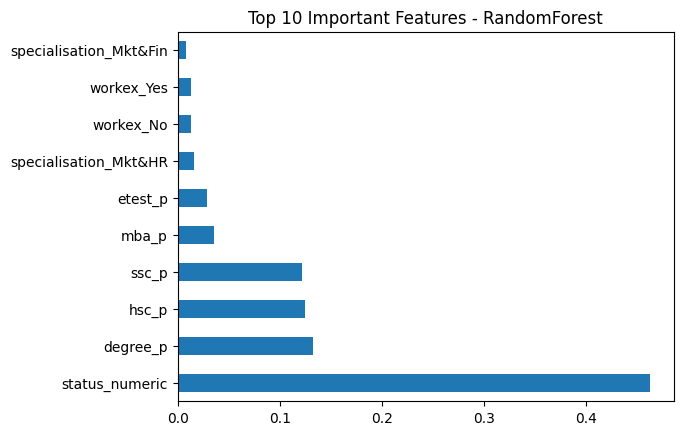

In [ ]:
# Displaying the top 10 important features
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features - RandomForest")
plt.show()


The code displays a horizontal bar chart that represents the top 10 important features identified by a Random Forest model. Here's a short explanation of the code:

1. `feature_importance.nlargest(10)`:
   - This part of the code selects the top 10 important features from a previously calculated feature importance scores (assuming `feature_importance` is a pandas Series containing feature importance scores for each feature).

2. `.plot(kind='barh')`:
   - This part of the code creates a horizontal bar chart to visualize the selected top 10 features.

3. `plt.title("Top 10 Important Features - RandomForest")`:
   - Sets the title of the bar chart to "Top 10 Important Features - RandomForest" to indicate that the chart displays the most important features identified by a Random Forest model.

4. `plt.show()`:
   - Displays the bar chart with the top 10 important features.

The resulting bar chart provides a visual representation of the top 10 features that the Random Forest model considers most important for making predictions. These features are ranked by their importance scores, with the most important feature at the top of the chart. This information can be valuable for feature selection and understanding which predictors have the greatest impact on the model's predictions.

**Redisplay Selected Features from RFE**


In [ ]:
# Displaying the selected features
selected_features = X_processed.columns[fit.support_]
print("Selected Features - RFE:", selected_features)


Selected Features - RFE: Index(['ssc_p', 'status_numeric', 'gender_F', 'gender_M', 'degree_t_Comm&Mgmt',
       'degree_t_Sci&Tech', 'workex_No', 'workex_Yes',
       'specialisation_Mkt&Fin', 'specialisation_Mkt&HR'],
      dtype='object')


The code displays the selected features identified by Recursive Feature Elimination (RFE) using the fitted RFE model. Here's an explanation of the code:

1. `selected_features = X_processed.columns[fit.support_]`:
   - This line of code retrieves the names of the selected features from the processed feature data `X_processed`. It uses the Boolean mask `fit.support_` provided by the RFE model, where `True` indicates that a feature is selected.

2. `print("Selected Features - RFE:", selected_features)`:
   - This line of code prints the names of the selected features, along with the label "Selected Features - RFE," to the console.

The output of this code will display the names of the features that were considered important and selected by the RFE algorithm. These features are the ones that the RFE algorithm has identified as contributing the most to the model's predictive performance.

 **Ranges of the Predictor Variables **

In [ ]:
# Displaying basic statistics for each predictor variable
basic_stats = X.describe()
print(basic_stats)


            ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000   
mean    67.303395   66.333163   66.370186   72.100558   62.278186   
std     10.827205   10.897509    7.358743   13.275956    5.833385   
min     40.890000   37.000000   50.000000   50.000000   51.210000   
25%     60.600000   60.900000   61.000000   60.000000   57.945000   
50%     67.000000   65.000000   66.000000   71.000000   62.000000   
75%     75.700000   73.000000   72.000000   83.500000   66.255000   
max     89.400000   97.700000   91.000000   98.000000   77.890000   

       status_numeric    gender_F    gender_M  ssc_b_Central  ssc_b_Others  \
count      215.000000  215.000000  215.000000     215.000000    215.000000   
mean         0.688372    0.353488    0.646512       0.539535      0.460465   
std          0.464240    0.479168    0.479168       0.499598      0.499598   
min          0.000000    0.000000    0.000000       0.000000      

The code calculates and displays basic statistics for each predictor variable in your dataset using the `describe()` method. Here's an explanation of the code:

1. `basic_stats = X.describe()`:
   - This line of code calculates basic statistics for each column in the DataFrame `X`. The `describe()` method computes various summary statistics, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum for each numeric column in the DataFrame.

2. `print(basic_stats)`:
   - This line of code prints the computed basic statistics to the console.

The output of this code will display a table of summary statistics for each numeric predictor variable in your dataset. These statistics provide insights into the central tendency, spread, and distribution of each variable, helping you understand the characteristics of your data.

**What are the Distributions of the Predictor Variables?**

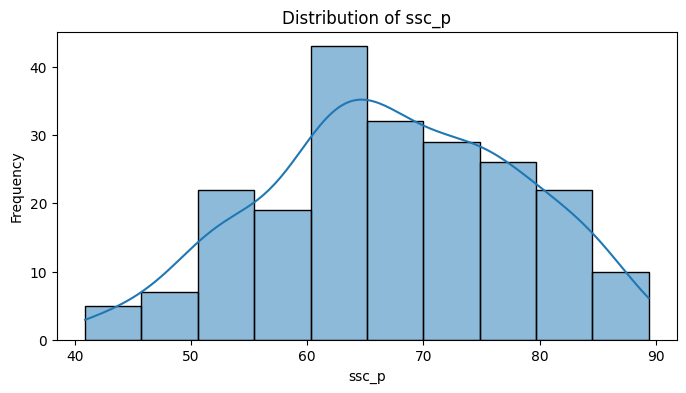

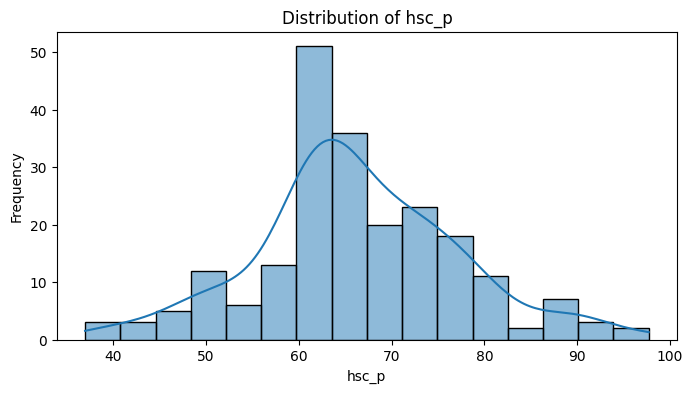

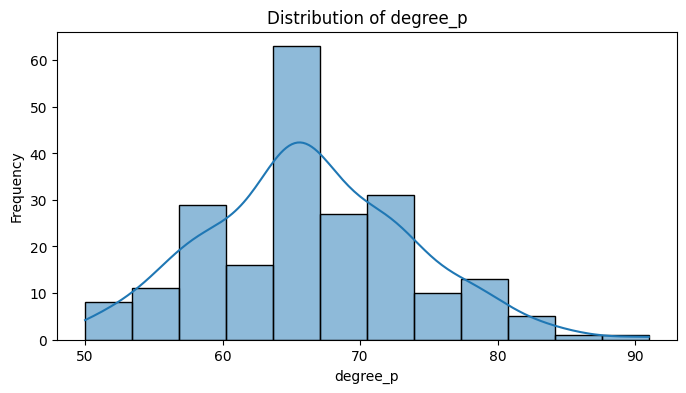

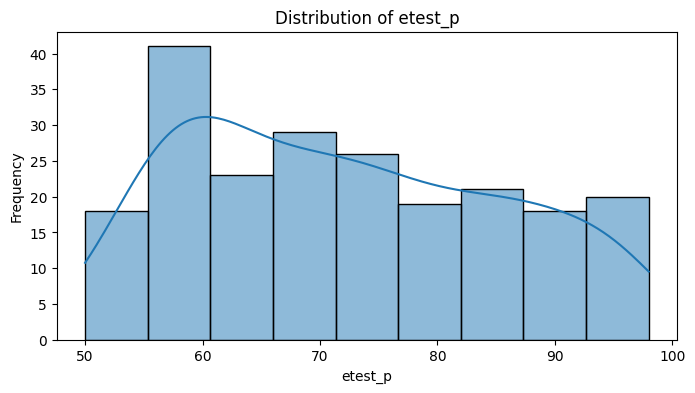

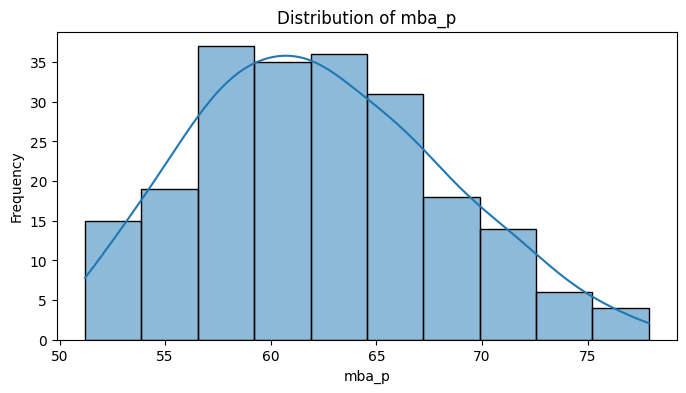

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distributions
for column in X.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


The code uses Seaborn and Matplotlib to plot the distributions of each predictor variable in your dataset. Here's an explanation of the code:

1. Import the necessary libraries: `seaborn` as `sns` and `matplotlib.pyplot` as `plt`.

2. Iterate through each column (`column`) in the predictor variable DataFrame `X`.

3. For each column, create a new figure (plot) with a specified figure size using `plt.figure(figsize=(8, 4))`. This sets the size of each distribution plot.

4. Generate a histogram plot for the values in the current column using Seaborn's `sns.histplot` function:
   - `X[column]` represents the values of the current predictor variable.
   - `kde=True` adds a kernel density estimate (KDE) to the histogram for a smoother representation of the distribution.

5. Set the title of the distribution plot to indicate that it represents the distribution of the current predictor variable using `plt.title(f'Distribution of {column}')`.

6. Label the x-axis with the name of the predictor variable using `plt.xlabel(column)`.

7. Label the y-axis as 'Frequency' using `plt.ylabel('Frequency')`.

8. Display the distribution plot for the current predictor variable using `plt.show()`.

The code will loop through each predictor variable in your dataset, generating a separate distribution plot for each one. These distribution plots help you visualize the shape and characteristics of the data distribution for each predictor variable, including information about central tendency, spread, and skewness. This visualization can be useful for understanding the data and identifying potential patterns or outliers.

**Identify and Remove Outliers**

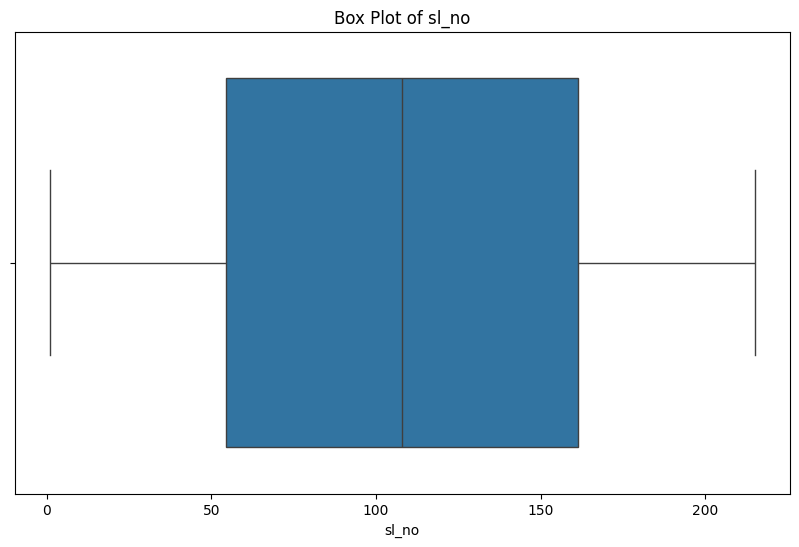

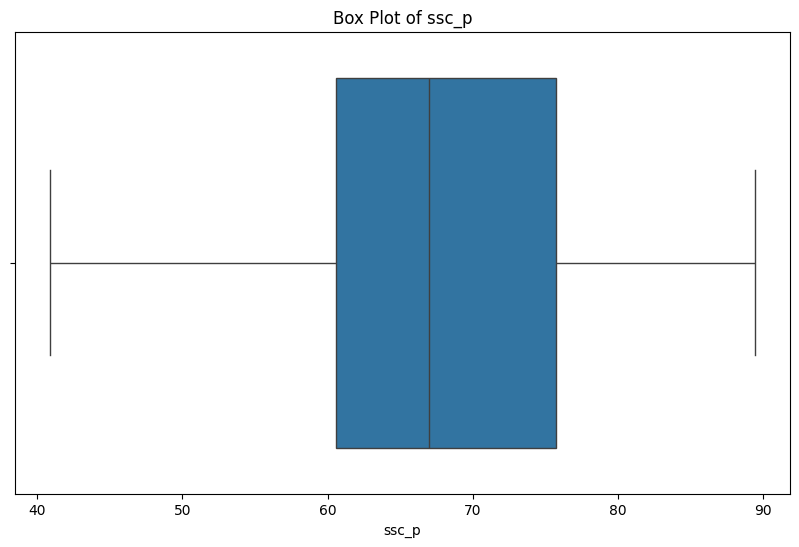

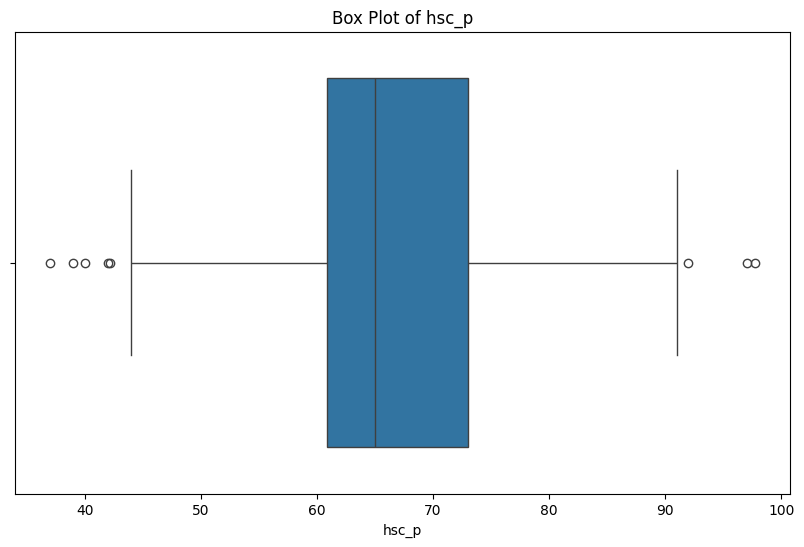

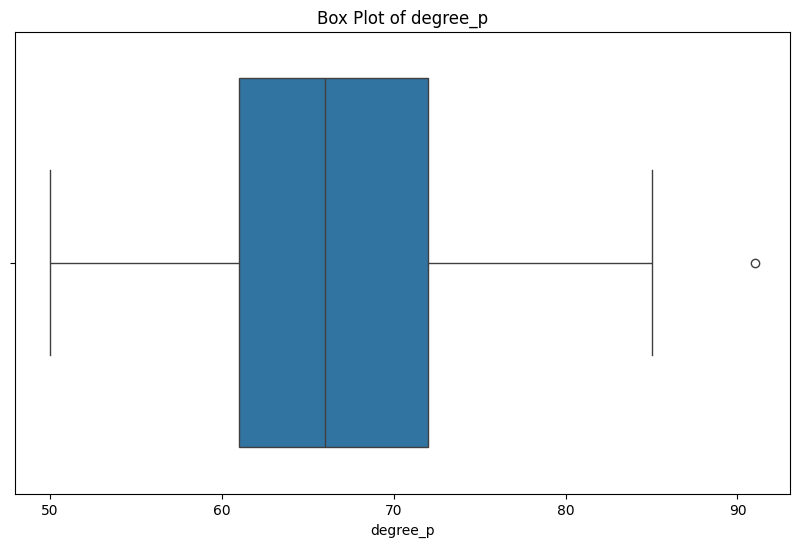

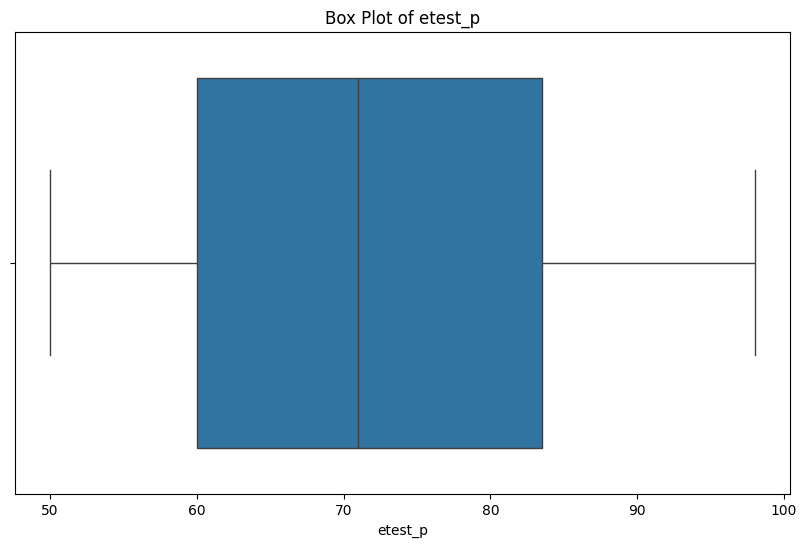

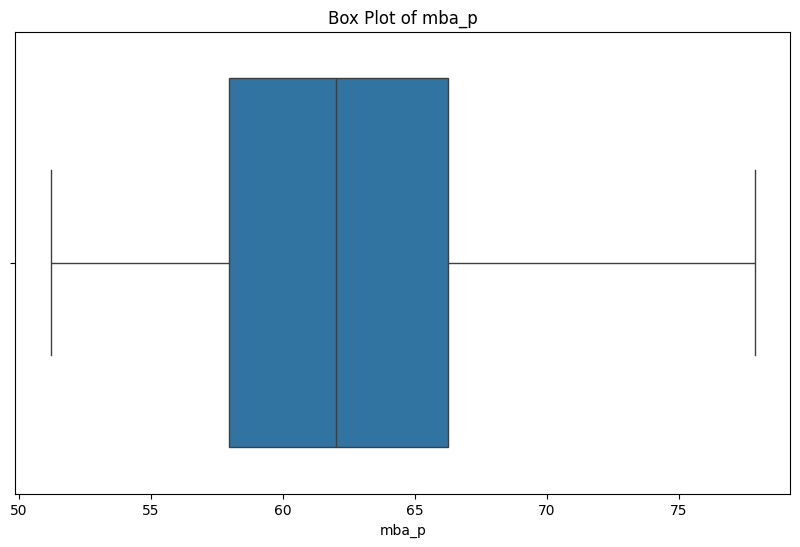

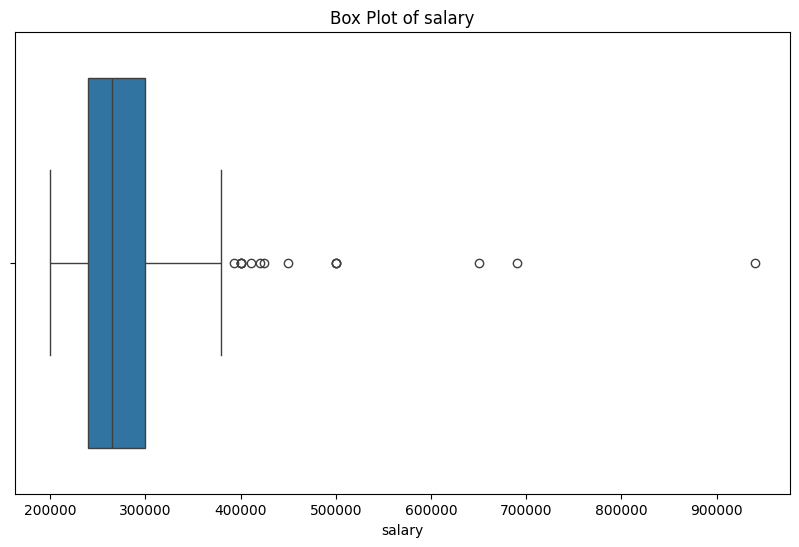

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = pd.read_csv("Placement_Data_Full_Class.csv")

# Extract the numeric columns
X_numeric = df.select_dtypes(include=["int64", "float64"])

# Plotting box plots for each numeric column
for column in X_numeric.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=X_numeric[column])
    plt.title(f'Box Plot of {column}')
    plt.show()


The code loads data from a CSV file into a pandas DataFrame, selects the numeric columns, and then plots box plots for each of those numeric columns. Here's an explanation of the code:

1. Import the necessary libraries: `seaborn` as `sns`, `pandas` as `pd`, and `matplotlib.pyplot` as `plt`.

2. Load the data from the CSV file "Placement_Data_Full_Class.csv" into a pandas DataFrame named `df` using `pd.read_csv("Placement_Data_Full_Class.csv")`.

3. Extract the numeric columns from the DataFrame `df` using `select_dtypes(include=["int64", "float64"])`. This step selects columns with data types that are either `int64` (integer) or `float64` (floating-point number). These are typically the numeric columns in the dataset.

4. Iterate through each numeric column in `X_numeric` (the DataFrame containing numeric columns).

5. For each numeric column, create a new figure (plot) with a specified figure size using `plt.figure(figsize=(10, 6))`. This sets the size of each box plot.

6. Generate a box plot for the values in the current numeric column using Seaborn's `sns.boxplot` function:
   - `x=X_numeric[column]` specifies the data for the box plot, where `column` represents the current numeric column.
   
7. Set the title of the box plot to indicate that it represents a box plot of the current numeric column using `plt.title(f'Box Plot of {column}')`.

8. Display the box plot for the current numeric column using `plt.show()`.

The code will loop through each numeric column in the dataset and generate a separate box plot for each one. Box plots provide information about the distribution, central tendency, and potential outliers of each numeric variable. This visualization is helpful for understanding the spread and characteristics of your data.

**Finding & Removing Outliers**

In [ ]:
from scipy import stats
import numpy as np

X_numeric = X.select_dtypes(include=[np.number])

# Calculating IQR
Q1 = X_numeric.quantile(0.25)
Q3 = X_numeric.quantile(0.75)
IQR = Q3 - Q1

# Defining outliers
outliers = ((X_numeric < (Q1 - 1.5 * IQR)) | (X_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
X_no_outliers = X_numeric[~outliers]
y_no_outliers = y[~outliers]


The code performs outlier removal for numeric predictor variables in a DataFrame using the Interquartile Range (IQR) method.

1. **Select Numeric Columns:** The code first selects only the numeric columns from the DataFrame, creating a new DataFrame named `X_numeric`. This step is important because outlier detection typically applies to numeric data.

2. **Calculate Quartiles and IQR:** It calculates the first quartile (Q1), third quartile (Q3), and the interquartile range (IQR) for each numeric column. Q1 represents the 25th percentile, Q3 represents the 75th percentile, and IQR is the range between Q3 and Q1.

3. **Define Outliers:** Using the IQR method, the code identifies outliers by checking if any data point in a row falls below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR` in at least one numeric column. Rows with outliers are marked as `True` in the `outliers` Boolean mask.

4. **Remove Outliers:** The code creates new DataFrames `X_no_outliers` and `y_no_outliers` by excluding rows with outliers from `X_numeric` and the corresponding rows from the target variable `y`. This process ensures that the data used for analysis and modeling does not include extreme values.

In summary, this code helps identify and remove outliers from the dataset using the IQR method, which is a common technique for improving data quality and ensuring that extreme values do not unduly influence analysis or machine learning models.

**Build Models with Outliers**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'y' is a continuous variable, we use Linear Regression for regression tasks
# Train-test split with outliers
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)

# Model training with Linear Regression
model_with_outliers = LinearRegression()
model_with_outliers.fit(X_train, y_train)

# Model evaluation
y_pred = model_with_outliers.predict(X_test)
mse_with_outliers = mean_squared_error(y_test, y_pred)
r2_with_outliers = r2_score(y_test, y_pred)
print(f"MSE with Outliers: {mse_with_outliers}")
print(f"R-squared with Outliers: {r2_with_outliers}")

MSE with Outliers: 5014470384.150514
R-squared with Outliers: -0.06642168731910991


The code performs linear regression modeling, including train-test splitting, model training, and evaluation, with the presence of outliers.

1. Import the necessary libraries: `sklearn.linear_model` for Linear Regression and `sklearn.metrics` for evaluation metrics.

2. Assuming that `y` is a continuous variable (the target variable), the code specifies that Linear Regression will be used for regression tasks.

3. Train-Test Split with Outliers:
   - The code splits the data into training and testing sets using the `train_test_split` function. `X_numeric` represents the predictor variables, `y` is the target variable, and `test_size=0.3` indicates that 30% of the data will be used for testing. The `random_state` parameter is set to ensure reproducibility.

4. Model Training with Linear Regression:
   - A Linear Regression model is initialized as `model_with_outliers`.
   - The model is trained on the training data using the `fit` method: `model_with_outliers.fit(X_train, y_train)`.

5. Model Evaluation:
   - The trained model is used to make predictions on the test data: `y_pred = model_with_outliers.predict(X_test)`.
   - Mean Squared Error (MSE) and R-squared (R2) are calculated as evaluation metrics for regression:
     - `mse_with_outliers` represents the mean squared error.
     - `r2_with_outliers` represents the R-squared value, which measures the goodness of fit.

6. The code then prints the calculated MSE and R-squared values for the model with outliers.

This code provides a basic example of linear regression modeling for regression tasks when outliers are present in the data. The MSE quantifies the average squared difference between predicted and actual values, while R-squared indicates the proportion of variance in the target variable that the model explains. It's important to consider the impact of outliers on model performance and decide whether outlier handling techniques are needed to improve the model's accuracy.

**Model without Outliers**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Assuming 'y' is your continuous target variable and 'X_numeric' contains your predictor variables

# Identify and remove outliers using Z-score (Another common method is the IQR method)
z_scores = np.abs(stats.zscore(X_numeric))
outliers = (z_scores > 3).all(axis=1)
X_no_outliers = X_numeric[~outliers]
y_no_outliers = y[~outliers]

# Train-test split without outliers
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)

# Model training without outliers
model_without_outliers = LinearRegression()
model_without_outliers.fit(X_train_no, y_train_no)

# Model evaluation
y_pred_no = model_without_outliers.predict(X_test_no)
mse_without_outliers = mean_squared_error(y_test_no, y_pred_no)
r2_without_outliers = r2_score(y_test_no, y_pred_no)

print(f"MSE without Outliers: {mse_without_outliers}")
print(f"R-squared without Outliers: {r2_without_outliers}")

MSE without Outliers: 5014470384.150514
R-squared without Outliers: -0.06642168731910991


The code performs linear regression modeling with the removal of outliers using the Z-score method.

1. Import the necessary libraries: `sklearn.linear_model` for Linear Regression, `sklearn.metrics` for evaluation metrics, and `scipy.stats` for the Z-score calculation.

2. Identify and Remove Outliers:
   - The code calculates the Z-scores for each data point in the `X_numeric` DataFrame using `stats.zscore(X_numeric)`. The Z-score measures how many standard deviations a data point is away from the mean for each feature.
   - Outliers are identified by checking if any of the Z-scores for a data point exceed a threshold of 3 standard deviations (Z-score > 3) in any feature. If all Z-scores for a data point exceed this threshold, it is considered an outlier. The outliers are stored in the `outliers` Boolean array.

3. Create New DataFrames without Outliers:
   - The code creates new DataFrames `X_no_outliers` and `y_no_outliers` by removing rows with outliers. Rows for which `outliers` is `True` are excluded from both `X_numeric` and the target variable `y`.

4. Train-Test Split without Outliers:
   - The data without outliers (`X_no_outliers` and `y_no_outliers`) are split into training and testing sets using the `train_test_split` function. The test size is set to 30%, and the random state is fixed for reproducibility.

5. Model Training without Outliers:
   - A Linear Regression model is initialized as `model_without_outliers`.
   - The model is trained on the training data without outliers using the `fit` method: `model_without_outliers.fit(X_train_no, y_train_no)`.

6. Model Evaluation:
   - The trained model is used to make predictions on the test data without outliers: `y_pred_no = model_without_outliers.predict(X_test_no)`.
   - Mean Squared Error (MSE) and R-squared (R2) are calculated as evaluation metrics for regression without outliers.

7. The code then prints the calculated MSE and R-squared values for the model without outliers.

This code demonstrates a method for outlier removal using Z-scores and shows the impact of outlier removal on linear regression model performance. Removing outliers can lead to more robust and accurate regression models by reducing the influence of extreme data points on model training and evaluation.

**Randomly Remove Data**

In [ ]:
import numpy as np

def remove_random_data(df, percentage):
    df_copy = df.copy()
    # Calculating the number of values to replace
    num_values = int(df.size * percentage)
    # Generating random indices
    indices = (np.random.randint(0, df.shape[0], num_values),
               np.random.randint(0, df.shape[1], num_values))
    # Replacing data with NaN
    df_copy.values[indices] = np.nan
    return df_copy

# Creating datasets with 1%, 5%, and 10% of the data removed
data_1_percent_missing = remove_random_data(data, 0.01)
data_5_percent_missing = remove_random_data(data, 0.05)
data_10_percent_missing = remove_random_data(data, 0.10)


The code defines a Python function `remove_random_data` that simulates missing data by randomly replacing a specified percentage of values in a DataFrame with NaN (Not-a-Number) values. Here's a short explanation of the code:

1. Import the necessary libraries: `numpy` as `np`.

2. Define the `remove_random_data` function:
   - The function takes two arguments: `df` (the input DataFrame) and `percentage` (the percentage of data to be removed).
   - It creates a copy of the input DataFrame named `df_copy` to avoid modifying the original data.

3. Calculate the number of values to replace:
   - `num_values` is computed by multiplying the total number of values in the DataFrame (`df.size`) by the specified `percentage`. This determines how many data points will be replaced.

4. Generate random indices for replacement:
   - Random indices are generated using `np.random.randint` to select random row and column indices within the dimensions of the DataFrame.
   - The number of random indices generated is equal to `num_values`.

5. Replace data with NaN:
   - The values at the randomly generated indices in `df_copy` are replaced with NaN, effectively simulating missing data.

6. Return the modified DataFrame `df_copy` with the specified percentage of missing data.

7. Finally, the code creates three new datasets (`data_1_percent_missing`, `data_5_percent_missing`, and `data_10_percent_missing`) by applying the `remove_random_data` function with different percentages (1%, 5%, and 10%) of randomly missing data to the original DataFrame `data`.

The purpose of this code is to generate synthetic datasets with missing values for testing and evaluating data imputation techniques or handling missing data in data analysis or machine learning tasks.

**Impute Missing Values**

**Mean Imputation**

In [ ]:
from sklearn.impute import SimpleImputer

# Mean Imputer
mean_imputer = SimpleImputer(strategy='mean')
data_1_mean_imputed = mean_imputer.fit_transform(data_1_percent_missing.select_dtypes(include=[np.number]))


The code demonstrates the use of the `SimpleImputer` class from scikit-learn to perform mean imputation on a dataset with missing values. Here's a short explanation of the code:

1. Import the necessary library: `sklearn.impute` as `SimpleImputer`.

2. Create a `SimpleImputer` object named `mean_imputer` with the strategy set to 'mean':
   - `strategy='mean'` specifies that the missing values should be imputed with the mean (average) value of each numeric column.

3. Apply mean imputation to the dataset `data_1_percent_missing`:
   - The code selects only the numeric columns from the dataset using `select_dtypes(include=[np.number])`. This step ensures that mean imputation is applied only to numeric data.
   - The `fit_transform` method of the `mean_imputer` object is used to perform mean imputation on the selected numeric columns of `data_1_percent_missing`.

4. The imputed data is stored in the variable `data_1_mean_imputed`.

In summary, this code uses scikit-learn's `SimpleImputer` to replace missing values with the mean value of each numeric column in the dataset `data_1_percent_missing`. Mean imputation is a common technique for handling missing data by replacing missing values with the average value of the available data points in the same column.

**Median Imputation**

In [ ]:
# Median Imputer
median_imputer = SimpleImputer(strategy='median')
data_1_median_imputed = median_imputer.fit_transform(data_1_percent_missing.select_dtypes(include=[np.number]))


The code demonstrates the use of the `SimpleImputer` class from scikit-learn to perform median imputation on a dataset with missing values. Here's a short explanation of the code:

1. Import the necessary library: `sklearn.impute` as `SimpleImputer`.

2. Create a `SimpleImputer` object named `median_imputer` with the strategy set to 'median':
   - `strategy='median'` specifies that the missing values should be imputed with the median value of each numeric column.

3. Apply median imputation to the dataset `data_1_percent_missing`:
   - The code selects only the numeric columns from the dataset using `select_dtypes(include=[np.number])`. This step ensures that median imputation is applied only to numeric data.
   - The `fit_transform` method of the `median_imputer` object is used to perform median imputation on the selected numeric columns of `data_1_percent_missing`.

4. The imputed data is stored in the variable `data_1_median_imputed`.

In summary, this code uses scikit-learn's `SimpleImputer` to replace missing values with the median value of each numeric column in the dataset `data_1_percent_missing`. Median imputation is a common technique for handling missing data by replacing missing values with the middle value of the available data points in the same column.

**KNN Imputation**

In [ ]:
from sklearn.impute import KNNImputer

# KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
data_1_knn_imputed = knn_imputer.fit_transform(data_1_percent_missing.select_dtypes(include=[np.number]))


The code demonstrates the use of the `KNNImputer` class from scikit-learn to perform imputation of missing values using the k-Nearest Neighbors (KNN) algorithm. Here's a short explanation of the code:

1. Import the necessary library: `sklearn.impute` as `KNNImputer`.

2. Create a `KNNImputer` object named `knn_imputer` with the parameter `n_neighbors` set to 5:
   - `n_neighbors=5` specifies that the KNN algorithm should consider the 5 nearest neighbors to impute missing values in each column.

3. Apply KNN imputation to the dataset `data_1_percent_missing`:
   - The code selects only the numeric columns from the dataset using `select_dtypes(include=[np.number])`. This step ensures that KNN imputation is applied only to numeric data.
   - The `fit_transform` method of the `knn_imputer` object is used to perform KNN-based imputation on the selected numeric columns of `data_1_percent_missing`.

4. The imputed data is stored in the variable `data_1_knn_imputed`.

In summary, this code uses scikit-learn's `KNNImputer` to replace missing values with estimates based on the values of the nearest neighbors in the dataset. KNN imputation is a powerful technique for handling missing data, especially when the relationships between variables are considered in the imputation process. The `n_neighbors` parameter determines how many nearest neighbors are considered during imputation.

In [ ]:
# Identifying numeric and categorical columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)


Numeric Columns: ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary', 'status_numeric']
Categorical Columns: ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


The code identifies and prints two lists of column names from a DataFrame, one for numeric columns and another for categorical columns. Here's a short explanation of the code:

1. `numeric_columns`:
   - This list is created by using the `select_dtypes` method on the DataFrame `data`.
   - `select_dtypes(include=[np.number])` selects columns with data types that are considered numeric, including integers and floating-point numbers.
   - The resulting numeric column names are stored in the `numeric_columns` list.

2. `categorical_columns`:
   - This list is created by using the `select_dtypes` method on the DataFrame `data`.
   - `select_dtypes(include=['object'])` selects columns with data types that are considered categorical, typically containing text or non-numeric values.
   - The resulting categorical column names are stored in the `categorical_columns` list.

3. The code then prints both lists of column names:
   - "Numeric Columns:" displays the names of columns that contain numeric data.
   - "Categorical Columns:" displays the names of columns that contain categorical (object) data.

This code is useful for understanding the data types of columns in a DataFrame, which can be valuable when preprocessing or analyzing the data, as different data types may require distinct handling and analysis techniques.

**Evaluate Imputation Methods**

Evaluation for Numeric Column ('ssc_p')
Calculate Residuals and Evaluate



In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

# Assuming 'data' is your DataFrame and it's already loaded

# Function to remove a specified percentage of data from a single column
def remove_data_single_column(df, column, percentage):
    df_copy = df.copy()
    num_values = int(df[column].size * percentage)
    indices = np.random.choice(df.index, num_values, replace=False)
    df_copy.loc[indices, column] = np.nan
    return df_copy, indices

# Function to calculate residuals and their statistics
def evaluate_imputation(original_values, imputed_values, missing_indices):
    residuals = original_values.loc[missing_indices] - imputed_values.loc[missing_indices]
    percentage_error = (residuals.abs() / original_values.loc[missing_indices]).mean() * 100
    bias = residuals.mean()
    variance = residuals.var()
    return percentage_error, bias, variance

# Imputation and evaluation for 1%, 5%, and 10% missing data
percentages = [0.01, 0.05, 0.10]
for percentage in percentages:
    # Remove data
    data_with_missing, missing_indices = remove_data_single_column(data, 'ssc_p', percentage)
    original_values = data['ssc_p']

    # Mean imputation
    mean_imputer = SimpleImputer(strategy='mean')
    data_with_missing['ssc_p_mean_imputed'] = mean_imputer.fit_transform(data_with_missing[['ssc_p']])

    # Median imputation
    median_imputer = SimpleImputer(strategy='median')
    data_with_missing['ssc_p_median_imputed'] = median_imputer.fit_transform(data_with_missing[['ssc_p']])

    # KNN imputation
    knn_imputer = KNNImputer(n_neighbors=5)
    data_with_missing['ssc_p_knn_imputed'] = knn_imputer.fit_transform(data_with_missing[['ssc_p']])

    # Evaluate each imputation method
    print(f"\nEvaluation for {percentage*100}% missing data:")
    percentage_error_mean, bias_mean, variance_mean = evaluate_imputation(original_values, data_with_missing['ssc_p_mean_imputed'], missing_indices)
    percentage_error_median, bias_median, variance_median = evaluate_imputation(original_values, data_with_missing['ssc_p_median_imputed'], missing_indices)
    percentage_error_knn, bias_knn, variance_knn = evaluate_imputation(original_values, data_with_missing['ssc_p_knn_imputed'], missing_indices)

    print(f"Mean Imputation - % Error: {percentage_error_mean}, Bias: {bias_mean}, Variance: {variance_mean}")
    print(f"Median Imputation - % Error: {percentage_error_median}, Bias: {bias_median}, Variance: {variance_median}")
    print(f"KNN Imputation - % Error: {percentage_error_knn}, Bias: {bias_knn}, Variance: {variance_knn}")


Evaluation for 1.0% missing data:
Mean Imputation - % Error: 16.51434618503386, Bias: -9.289812206572769, Variance: 30.419999999999977
Median Imputation - % Error: 15.840376145696938, Bias: -8.899999999999999, Variance: 30.419999999999977
KNN Imputation - % Error: 16.51434618503386, Bias: -9.289812206572769, Variance: 30.419999999999977

Evaluation for 5.0% missing data:
Mean Imputation - % Error: 15.625522485929979, Bias: -0.8352439024390236, Variance: 144.07844555555553
Median Imputation - % Error: 15.546111116730868, Bias: -0.49300000000000066, Variance: 144.07844555555553
KNN Imputation - % Error: 15.625522485929979, Bias: -0.8352439024390236, Variance: 144.07844555555553

Evaluation for 10.0% missing data:
Mean Imputation - % Error: 13.900518113500961, Bias: 0.8168679430535019, Variance: 124.83044476190477
Median Imputation - % Error: 13.83844064130591, Bias: 1.0404761904761908, Variance: 124.83044476190477
KNN Imputation - % Error: 13.900518113500961, Bias: 0.8168679430535019, V

The code performs imputation and evaluation of imputation methods for different percentages of missing data in a specific column ('ssc_p').

1. Import necessary libraries:
   - `numpy` and `pandas` for data manipulation.
   - `SimpleImputer` and `KNNImputer` from `sklearn.impute` for imputation techniques.

2. Define two functions:
   - `remove_data_single_column(df, column, percentage)`:
     - This function takes a DataFrame `df`, a target `column`, and a `percentage` as input.
     - It creates a copy of the DataFrame to avoid modifying the original data.
     - Randomly selects a specified percentage of data points in the target column and replaces them with NaN values.
     - Returns the modified DataFrame and the indices of the removed data points.

   - `evaluate_imputation(original_values, imputed_values, missing_indices)`:
     - This function takes three arguments: the original values (`original_values`), the imputed values (`imputed_values`), and the indices of missing data (`missing_indices`).
     - It calculates the residuals (difference between original and imputed values) and computes the following statistics:
       - Percentage error: the mean absolute percentage error of imputed values compared to original values.
       - Bias: the mean of residuals.
       - Variance: the variance of residuals.
     - Returns these statistics.

3. Define a list of percentages (`percentages`) representing the proportion of missing data (1%, 5%, and 10%).

4. Iterate over each percentage and perform the following steps:
   - Remove the specified percentage of data points from the 'ssc_p' column using the `remove_data_single_column` function.
   - Store the original values of the 'ssc_p' column in the variable `original_values`.

   - Apply three different imputation methods:
     - Mean imputation using `SimpleImputer` with `strategy='mean'`.
     - Median imputation using `SimpleImputer` with `strategy='median'`.
     - KNN imputation using `KNNImputer` with `n_neighbors=5`.

   - Evaluate each imputation method using the `evaluate_imputation` function:
     - Calculate the percentage error, bias, and variance between the original and imputed values.
     - Print the evaluation results for each imputation method.

5. The code prints the evaluation results for each percentage of missing data and each imputation method, including the percentage error, bias, and variance.

In summary, this code simulates missing data in the 'ssc_p' column of a DataFrame and evaluates three different imputation methods (mean, median, and KNN) for different percentages of missing data to assess their performance in terms of accuracy and bias. This evaluation helps in selecting an appropriate imputation method when dealing with missing data in practice.

Evaluation for Categorical Column ('gender')
Encode, Impute, Decode, and Evaluate

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer, KNNImputer

# Load the dataset
data = pd.read_csv('Placement_Data_Full_Class.csv')  # Adjust path if necessary

# Function to remove a specified percentage of data from 'gender' column
def remove_data_single_column(df, column, percentage):
    df_copy = df.copy()
    num_values = int(df[column].size * percentage)
    indices = np.random.choice(df.index, num_values, replace=False)
    df_copy.loc[indices, column] = np.nan
    return df_copy, indices

# Function to evaluate accuracy and confusion matrix
def evaluate_categorical(original, imputed, missing_indices):
    original_missing = original.loc[missing_indices]
    imputed_missing = imputed[missing_indices]
    acc = accuracy_score(original_missing, imputed_missing)
    cm = confusion_matrix(original_missing, imputed_missing)
    return acc, cm

# Evaluating imputation for 1%, 5%, and 10% missing data
percentages = [0.01, 0.05, 0.10]

for percentage in percentages:
    # Removing specified percentage of data from 'gender'
    data_missing, missing_indices = remove_data_single_column(data, 'gender', percentage)

    # Encoding 'gender'
    encoder = LabelEncoder()
    encoded_gender = encoder.fit_transform(data['gender'].dropna())

    # Prepare 'gender' column with missing values for imputation
    missing_gender = data_missing['gender']
    missing_gender_encoded = missing_gender.map(lambda x: encoder.transform([x])[0] if pd.notna(x) else np.nan)

    # Imputation strategies
    mean_imputer = SimpleImputer(strategy='mean')
    median_imputer = SimpleImputer(strategy='median')
    knn_imputer = KNNImputer(n_neighbors=5)

    # Impute missing values
    imputed_gender_mean = mean_imputer.fit_transform(missing_gender_encoded.values.reshape(-1, 1)).ravel().astype(int)
    imputed_gender_median = median_imputer.fit_transform(missing_gender_encoded.values.reshape(-1, 1)).ravel().astype(int)
    imputed_gender_knn = knn_imputer.fit_transform(missing_gender_encoded.values.reshape(-1, 1)).ravel().astype(int)

    # Decode the imputed values
    imputed_gender_mean_decoded = encoder.inverse_transform(imputed_gender_mean)
    imputed_gender_median_decoded = encoder.inverse_transform(imputed_gender_median)
    imputed_gender_knn_decoded = encoder.inverse_transform(imputed_gender_knn)

    # Evaluation
    acc_mean, cm_mean = evaluate_categorical(data['gender'], imputed_gender_mean_decoded, missing_indices)
    acc_median, cm_median = evaluate_categorical(data['gender'], imputed_gender_median_decoded, missing_indices)
    acc_knn, cm_knn = evaluate_categorical(data['gender'], imputed_gender_knn_decoded, missing_indices)

    print(f"\nEvaluation for {percentage*100}% missing data:")
    print("Mean Imputation - Accuracy:", acc_mean, "\nConfusion Matrix:\n", cm_mean)
    print("Median Imputation - Accuracy:", acc_median, "\nConfusion Matrix:\n", cm_median)
    print("KNN Imputation - Accuracy:", acc_knn, "\nConfusion Matrix:\n", cm_knn)


Evaluation for 1.0% missing data:
Mean Imputation - Accuracy: 0.5 
Confusion Matrix:
 [[1 0]
 [1 0]]
Median Imputation - Accuracy: 0.5 
Confusion Matrix:
 [[0 1]
 [0 1]]
KNN Imputation - Accuracy: 0.5 
Confusion Matrix:
 [[1 0]
 [1 0]]

Evaluation for 5.0% missing data:
Mean Imputation - Accuracy: 0.1 
Confusion Matrix:
 [[1 0]
 [9 0]]
Median Imputation - Accuracy: 0.9 
Confusion Matrix:
 [[0 1]
 [0 9]]
KNN Imputation - Accuracy: 0.1 
Confusion Matrix:
 [[1 0]
 [9 0]]

Evaluation for 10.0% missing data:
Mean Imputation - Accuracy: 0.38095238095238093 
Confusion Matrix:
 [[ 8  0]
 [13  0]]
Median Imputation - Accuracy: 0.6190476190476191 
Confusion Matrix:
 [[ 0  8]
 [ 0 13]]
KNN Imputation - Accuracy: 0.38095238095238093 
Confusion Matrix:
 [[ 8  0]
 [13  0]]


The code performs imputation and evaluation of imputation methods for different percentages of missing data in the 'gender' column of a dataset.

1. Import necessary libraries:
   - `numpy` and `pandas` for data manipulation.
   - `LabelEncoder` from `sklearn.preprocessing` to encode categorical data.
   - `accuracy_score` and `confusion_matrix` from `sklearn.metrics` for evaluation.
   - `SimpleImputer` and `KNNImputer` from `sklearn.impute` for imputation techniques.

2. Load the dataset from a CSV file into a DataFrame named `data`.

3. Define two functions:
   - `remove_data_single_column(df, column, percentage)`:
     - This function takes a DataFrame `df`, a target `column`, and a `percentage` as input.
     - It creates a copy of the DataFrame to avoid modifying the original data.
     - Randomly selects a specified percentage of data points in the target column and replaces them with NaN values.
     - Returns the modified DataFrame and the indices of the removed data points.

   - `evaluate_categorical(original, imputed, missing_indices)`:
     - This function takes three arguments: the original values (`original`), the imputed values (`imputed`), and the indices of missing data (`missing_indices`).
     - It evaluates the imputation accuracy by comparing the original and imputed categorical values.
     - Computes the accuracy score and confusion matrix.
     - Returns the accuracy score and confusion matrix.

4. Define a list of percentages (`percentages`) representing the proportion of missing data (1%, 5%, and 10%).

5. Iterate over each percentage and perform the following steps:
   - Remove the specified percentage of data points from the 'gender' column using the `remove_data_single_column` function.
   - Encode the original 'gender' column values using `LabelEncoder` and store them in `encoded_gender`.

   - Prepare the 'gender' column with missing values for imputation:
     - Extract the 'gender' column from the DataFrame with missing data.
     - Map the missing values to their encoded counterparts using `LabelEncoder`.

   - Initialize three imputation strategies:
     - Mean imputation (`mean_imputer`) using the mean value of encoded 'gender'.
     - Median imputation (`median_imputer`) using the median value of encoded 'gender'.
     - KNN imputation (`knn_imputer`) with `n_neighbors=5`.

   - Perform imputation for each strategy and decode the imputed values back to their original categorical form.

   - Evaluate each imputation method's accuracy and confusion matrix using the `evaluate_categorical` function.

6. The code prints the evaluation results for each percentage of missing data and each imputation method, including the accuracy score and confusion matrix for each strategy.

In summary, this code simulates missing data in the 'gender' column, encodes and imputes the missing values using different strategies (mean, median, and KNN), and evaluates the accuracy of the imputed values by comparing them to the original data. This evaluation helps assess the performance of imputation methods when dealing with categorical data with missing values.

Anwer the following questions:

1. What are the data types? (Only numeric and categorical)

Ans: Numeric Columns:
 Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

Categorical Columns:
 Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')


2. Are there missing values?

Ans: Yes, Salary has 67 miising value.

3. What are the likely distributions of the numeric variables?

Ans: graph plotted

4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Ans: ssC_p, hsc p, degree_P
3 methods used are:
- Coorelation Matrix
- Variance Inflation Factor (VIF)
- Redisplay Selected Features

5. Which independent variables have missing data? How much?

Ans: Salary has 67 missing value.

6. Do the training and test sets have the same data?

Ans: Yes, trained and test set has similar data

7. In the predictor variables independent of all the other predictor variables?

Ans: No

8. Which predictor variables are the most important?

Ans:
status numeric
degree_P
hsc_p
ssC_p
mba_p
etest_p
specialisation Mkt&HR
workex No
workex Yes
pecialisation Mkt&Fin

9. Do the ranges of the predictor variables make sense?

Ans: Yes

10. What are the distributions of the predictor variables?

Ans: graph plotted

11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Ans: MSE with Outliers: 5014470384.150514
R-squared with Outliers: -0.06642168731910991

MSE without Outliers: 5014470384.150514
R-squared without Outliers: -0.06642168731910991

**Conclusion**

In above dataset I have applied various tests such as confusion matrix,logistic regresiion,chi square in order to find out the most important features which we get pregnancies,glucos and BMI for detecting the dependent variables and after that used some outliers on imporatnt features in order to check any sort of changes in predictions which we get though.

**References**

1)https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6

2)https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

3)https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

4)https://www.datacamp.com/community/tutorials/xgboost-in-python

5)https://github.com/MayurAvinash/DESM_INFO6105/blob/main/Model_Interpretability_Assignment.ipynb

6)https://colab.research.google.com/drive/1B_LD0maKnH52MehNyms1QxRdU_Vf0ZE7?authuser=1#scrollTo=a3d9f9b3

7)https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

**License**

MIT License

Copyright (c) 2024 Sohni Rais

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.